# Telecom Churn Group Case Study


In [1]:
# import required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data
data=pd.read_csv("telecom_churn_data.csv")

In [3]:
# Check the Shape of Data
data.shape

(99999, 226)

In [4]:
pd.set_option("display.max_columns",None)
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Data Cleaning

In [6]:
# Checking for missing Values
percent_missing=round(100*data.isnull().sum().sort_values(ascending=False)/data.shape[0],2)
percent_missing.head(50)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

A lot of columns in 6th month Data is having 74.85% null values, same columns in 7th month data is having 74.43% null values, similar trend is seen in the other monthds data.

In [7]:
# Check Weather the null values in the above mentioned columns belong to the same rows.
null_col=round(data[data.arpu_3g_6.isnull()].isnull().sum().sort_values(ascending=False)*100/data.arpu_3g_6.isnull().sum(),2)
null_col[null_col>50]

arpu_3g_6                   100.00
night_pck_user_6            100.00
total_rech_data_6           100.00
arpu_2g_6                   100.00
max_rech_data_6             100.00
fb_user_6                   100.00
av_rech_amt_data_6          100.00
date_of_last_rech_data_6    100.00
count_rech_2g_6             100.00
count_rech_3g_6             100.00
date_of_last_rech_data_7     90.66
total_rech_data_7            90.66
fb_user_7                    90.66
max_rech_data_7              90.66
night_pck_user_7             90.66
count_rech_2g_7              90.66
av_rech_amt_data_7           90.66
arpu_3g_7                    90.66
arpu_2g_7                    90.66
count_rech_3g_7              90.66
max_rech_data_8              88.16
arpu_3g_8                    88.16
total_rech_data_8            88.16
fb_user_8                    88.16
av_rech_amt_data_8           88.16
night_pck_user_8             88.16
count_rech_2g_8              88.16
count_rech_3g_8              88.16
arpu_2g_8           

More than 70% of data is missing for some of the columns,As can be noted from the above analysis the data is missing for same group of users, the above listed attributes can be droppped

In [8]:
# Drop the above identified Columns columns
col_null=percent_missing[percent_missing>70].index
data.drop(col_null,axis=1, inplace=True)

In [9]:
data.shape

(99999, 186)

In [10]:
# Again Checking for missing values
percent_missing=round(100*data.isnull().sum().sort_values(ascending=False)/data.shape[0],2)
percent_missing.head(20)

loc_og_t2m_mou_9    7.75
loc_ic_t2m_mou_9    7.75
offnet_mou_9        7.75
std_ic_t2f_mou_9    7.75
roam_ic_mou_9       7.75
std_og_t2t_mou_9    7.75
roam_og_mou_9       7.75
std_ic_t2m_mou_9    7.75
loc_og_t2t_mou_9    7.75
std_ic_t2o_mou_9    7.75
loc_og_mou_9        7.75
std_ic_t2t_mou_9    7.75
isd_og_mou_9        7.75
loc_ic_t2f_mou_9    7.75
loc_og_t2c_mou_9    7.75
loc_og_t2f_mou_9    7.75
loc_ic_t2t_mou_9    7.75
std_og_t2m_mou_9    7.75
spl_ic_mou_9        7.75
std_ic_mou_9        7.75
dtype: float64

For Better understanding the data its better to divide the data monthwise in june, july, august and september and general data

In [11]:
# seprate columns monthwise into respective lists.
import re
sept_col=[]
aug_col=[]
jul_col=[]
jun_col=[]
gen_col=[]
for i in data.columns:
    if re.search("9$",i):
        sept_col.append(i)
    elif re.search("8$",i):
        aug_col.append(i)
    elif re.search("7$",i):
        jul_col.append(i)
    elif re.search("6$",i):
        jun_col.append(i)
    else:
        gen_col.append(i)
        
sept_col.append("sep_vbc_3g")
aug_col.append("aug_vbc_3g")
jul_col.append("jul_vbc_3g")
jun_col.append("jun_vbc_3g")

In [12]:
# create a dataframe of general data
del gen_col[-4::]
gen_col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'aon']

In [13]:
# Checking the columns corresponding to june
jun_col

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'jun_vbc_3g']

In [14]:
# Splittting the Data Frame monthwise
jun_data=data[jun_col]
jul_data=data[jul_col]
aug_data=data[aug_col]
sept_data=data[sept_col]
gen_data=data[gen_col]
jun_data.shape

(99999, 45)

In [15]:
jun_data.head()

,last_date_of_month_6,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,jun_vbc_3g
0,6/30/2014,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,6/21/2014,252,30.13,83.57,0,0,1,0,101.20
1,6/30/2014,34.047,24.11,15.74,0.0,0.0,23.88,11.51,0.00,0.0,35.39,0.23,0.00,0.00,0.0,0.23,0.0,4.68,0.00,40.31,1.61,17.48,0.00,19.09,0.00,5.90,0.00,0.0,5.90,26.83,0.00,1.83,0.00,4,74,44,6/29/2014,44,0.00,0.00,0,0,0,0,0.00
2,6/30/2014,167.690,11.54,143.33,0.0,0.0,7.19,29.34,24.11,0.0,60.66,4.34,41.81,1.48,0.0,47.64,0.0,46.56,0.45,155.33,115.69,14.38,99.48,229.56,72.41,45.18,21.73,0.0,139.33,370.04,0.21,0.00,0.93,5,168,86,6/17/2014,0,0.00,0.00,0,0,0,0,4.17
3,6/30/2014,221.338,99.91,123.31,0.0,0.0,73.68,107.43,1.91,0.0,183.03,26.23,2.99,0.00,0.0,29.23,0.0,10.96,0.00,223.23,62.08,113.96,57.43,233.48,43.48,1.33,1.18,0.0,45.99,280.08,0.59,0.00,0.00,10,230,60,6/28/2014,30,0.00,0.00,0,0,0,0,0.00
4,6/30/2014,261.636,50.31,76.96,0.0,0.0,50.31,67.64,0.00,0.0,117.96,0.00,9.31,0.00,0.0,9.31,0.0,0.00,0.00,127.28,105.68,106.84,1.50,214.03,0.00,1.93,0.00,0.0,1.93,216.44,0.00,0.00,0.48,5,196,56,6/26/2014,50,0.00,0.00,0,1,0,0,0.00


In [16]:
# Checking for missing values in june
jun_null=round(jun_data.isnull().sum().sort_values(ascending=False)*100/data.shape[0],2)
jun_null[jun_null>0]

loc_ic_t2f_mou_6       3.94
std_og_mou_6           3.94
ic_others_6            3.94
isd_ic_mou_6           3.94
spl_ic_mou_6           3.94
std_ic_mou_6           3.94
std_ic_t2o_mou_6       3.94
std_ic_t2f_mou_6       3.94
std_ic_t2m_mou_6       3.94
std_ic_t2t_mou_6       3.94
loc_ic_mou_6           3.94
loc_ic_t2m_mou_6       3.94
loc_ic_t2t_mou_6       3.94
spl_og_mou_6           3.94
isd_og_mou_6           3.94
og_others_6            3.94
std_og_t2c_mou_6       3.94
loc_og_t2f_mou_6       3.94
onnet_mou_6            3.94
offnet_mou_6           3.94
roam_ic_mou_6          3.94
roam_og_mou_6          3.94
loc_og_t2t_mou_6       3.94
std_og_t2f_mou_6       3.94
loc_og_t2m_mou_6       3.94
loc_og_t2c_mou_6       3.94
loc_og_mou_6           3.94
std_og_t2t_mou_6       3.94
std_og_t2m_mou_6       3.94
date_of_last_rech_6    1.61
dtype: float64

In [17]:
# A lot of columns in june is having 3.94% null values. Lets check weather the data is missing for same rows
null_count=jun_data.loc_ic_t2f_mou_6.isnull().sum()
jun_null_repeated=round(jun_data[jun_data.loc_ic_t2f_mou_6.isnull()].isnull().sum().sort_values(ascending=False)*100/null_count,2)
jun_null_repeated[jun_null_repeated>0]

loc_ic_t2f_mou_6       100.00
std_og_mou_6           100.00
ic_others_6            100.00
isd_ic_mou_6           100.00
spl_ic_mou_6           100.00
std_ic_mou_6           100.00
std_ic_t2o_mou_6       100.00
std_ic_t2f_mou_6       100.00
std_ic_t2m_mou_6       100.00
std_ic_t2t_mou_6       100.00
loc_ic_mou_6           100.00
loc_ic_t2m_mou_6       100.00
loc_ic_t2t_mou_6       100.00
spl_og_mou_6           100.00
isd_og_mou_6           100.00
og_others_6            100.00
std_og_t2c_mou_6       100.00
loc_og_t2f_mou_6       100.00
onnet_mou_6            100.00
offnet_mou_6           100.00
roam_ic_mou_6          100.00
roam_og_mou_6          100.00
loc_og_t2t_mou_6       100.00
std_og_t2f_mou_6       100.00
loc_og_t2m_mou_6       100.00
loc_og_t2c_mou_6       100.00
loc_og_mou_6           100.00
std_og_t2t_mou_6       100.00
std_og_t2m_mou_6       100.00
date_of_last_rech_6     19.66
dtype: float64

The data is missing for same set of users.  
Create a dataframe to check the mode of the columns containing 3.94% missing values

In [18]:
# mode of columns contaning null
mode_of_column=[]
no_of_values=[]
for i in list(jun_null_repeated[jun_null_repeated==100].index):
    mode_of_column.append(jun_data[i].value_counts().head(1).index[0])
    no_of_values.append(max(jun_data[i].value_counts()))
                        

modeof_col_df=pd.DataFrame({"column":list(jun_null_repeated[jun_null_repeated==100].index),"Mode":mode_of_column,"no_of values":no_of_values})
modeof_col_df

,column,Mode,no_of values
0,loc_ic_t2f_mou_6,0.0,39141
1,std_og_mou_6,0.0,29413
2,ic_others_6,0.0,73919
3,isd_ic_mou_6,0.0,80463
4,spl_ic_mou_6,0.0,75316
5,std_ic_mou_6,0.0,24166
6,std_ic_t2o_mou_6,0.0,96062
7,std_ic_t2f_mou_6,0.0,75459
8,std_ic_t2m_mou_6,0.0,34602
9,std_ic_t2t_mou_6,0.0,54957


Mode of all the columns is 0.0, it appearsw that if the usage is 0.0 for some of usere NAN is mentioned in the corresponding column

In [19]:
# Imputing Null values by 0, and Checking for null values in june
col=list(jun_null_repeated[jun_null_repeated==100].index)
for i in col:
    jun_data.loc[jun_data[i].isnull(),i]=0.0
jun_data.isnull().sum().sort_values(ascending=False).head()

date_of_last_rech_6     1607
last_date_of_month_6       0
total_rech_num_6           0
std_ic_t2m_mou_6           0
std_ic_t2f_mou_6           0
dtype: int64

In [20]:
jun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_date_of_month_6  99999 non-null  object 
 1   arpu_6                99999 non-null  float64
 2   onnet_mou_6           99999 non-null  float64
 3   offnet_mou_6          99999 non-null  float64
 4   roam_ic_mou_6         99999 non-null  float64
 5   roam_og_mou_6         99999 non-null  float64
 6   loc_og_t2t_mou_6      99999 non-null  float64
 7   loc_og_t2m_mou_6      99999 non-null  float64
 8   loc_og_t2f_mou_6      99999 non-null  float64
 9   loc_og_t2c_mou_6      99999 non-null  float64
 10  loc_og_mou_6          99999 non-null  float64
 11  std_og_t2t_mou_6      99999 non-null  float64
 12  std_og_t2m_mou_6      99999 non-null  float64
 13  std_og_t2f_mou_6      99999 non-null  float64
 14  std_og_t2c_mou_6      99999 non-null  float64
 15  std_og_mou_6       

In [21]:
# Checking for missing values in remaning Months
jul_null=round(jul_data.isnull().sum().sort_values(ascending=False)*100/data.shape[0],2)
jul_null[jul_null>0]

loc_ic_t2f_mou_7        3.86
spl_ic_mou_7            3.86
std_ic_mou_7            3.86
std_ic_t2o_mou_7        3.86
std_ic_t2f_mou_7        3.86
std_ic_t2m_mou_7        3.86
std_ic_t2t_mou_7        3.86
loc_ic_mou_7            3.86
ic_others_7             3.86
loc_ic_t2m_mou_7        3.86
loc_ic_t2t_mou_7        3.86
og_others_7             3.86
spl_og_mou_7            3.86
isd_og_mou_7            3.86
std_og_mou_7            3.86
std_og_t2c_mou_7        3.86
std_og_t2f_mou_7        3.86
std_og_t2m_mou_7        3.86
std_og_t2t_mou_7        3.86
loc_og_mou_7            3.86
loc_og_t2c_mou_7        3.86
loc_og_t2f_mou_7        3.86
loc_og_t2m_mou_7        3.86
loc_og_t2t_mou_7        3.86
roam_og_mou_7           3.86
roam_ic_mou_7           3.86
offnet_mou_7            3.86
onnet_mou_7             3.86
isd_ic_mou_7            3.86
date_of_last_rech_7     1.77
last_date_of_month_7    0.60
dtype: float64

Same set of columns in july is having 3.86% null values. Same trend is repeating

In [22]:
aug_null=round(aug_data.isnull().sum().sort_values(ascending=False)*100/data.shape[0],2)
print(aug_null[aug_null>0])
sept_null=round(sept_data.isnull().sum().sort_values(ascending=False)*100/data.shape[0],2)
print(sept_null[sept_null>0])

loc_ic_t2f_mou_8        5.38
spl_ic_mou_8            5.38
std_ic_mou_8            5.38
std_ic_t2o_mou_8        5.38
std_ic_t2f_mou_8        5.38
std_ic_t2m_mou_8        5.38
std_ic_t2t_mou_8        5.38
loc_ic_mou_8            5.38
ic_others_8             5.38
loc_ic_t2m_mou_8        5.38
loc_ic_t2t_mou_8        5.38
og_others_8             5.38
spl_og_mou_8            5.38
isd_og_mou_8            5.38
std_og_mou_8            5.38
std_og_t2c_mou_8        5.38
std_og_t2f_mou_8        5.38
std_og_t2m_mou_8        5.38
std_og_t2t_mou_8        5.38
loc_og_mou_8            5.38
loc_og_t2c_mou_8        5.38
loc_og_t2f_mou_8        5.38
loc_og_t2m_mou_8        5.38
loc_og_t2t_mou_8        5.38
roam_og_mou_8           5.38
roam_ic_mou_8           5.38
offnet_mou_8            5.38
onnet_mou_8             5.38
isd_ic_mou_8            5.38
date_of_last_rech_8     3.62
last_date_of_month_8    1.10
dtype: float64
loc_ic_t2f_mou_9        7.75
spl_ic_mou_9            7.75
std_ic_mou_9            7.75

Same trend is repeating, but the number of NAN is increasing from Jul to Aug to Sept

In [23]:
# Imputing Null values by 0 in the remaning columns

for key,val in {"jul":3.86, "aug":5.38, "sept":7.75}.items():
    col=list(eval(key+"_null")[eval(key+"_null")==val].index)
    for i in col:
        eval(key+"_data").loc[eval(key+"_data")[i].isnull(),i]=0.0
    
    print(eval(key+"_data").isnull().sum().sort_values(ascending=False).head())



date_of_last_rech_7     1767
last_date_of_month_7     601
total_rech_num_7           0
std_ic_t2m_mou_7           0
std_ic_t2f_mou_7           0
dtype: int64
date_of_last_rech_8     3622
last_date_of_month_8    1100
total_rech_num_8           0
std_ic_t2m_mou_8           0
std_ic_t2f_mou_8           0
dtype: int64
date_of_last_rech_9     4760
last_date_of_month_9    1659
total_rech_num_9           0
std_ic_t2m_mou_9           0
std_ic_t2f_mou_9           0
dtype: int64


In [24]:
# checking last date of month
jul_data.last_date_of_month_7.value_counts()

7/31/2014    99398
Name: last_date_of_month_7, dtype: int64

In [25]:
# Replacing Nan in last date of month by last date of that specific month
jul_data.last_date_of_month_7.fillna(jul_data.last_date_of_month_7.mode().iloc[0],inplace=True)
aug_data.last_date_of_month_8.fillna(aug_data.last_date_of_month_8.mode().iloc[0],inplace=True)
sept_data.last_date_of_month_9.fillna(sept_data.last_date_of_month_9.mode().iloc[0],inplace=True)

In [26]:
jul_data.last_date_of_month_7.value_counts()

7/31/2014    99999
Name: last_date_of_month_7, dtype: int64

For the users whose date_of_last_recharge is missing lets check the total recharge amount for that specific month

In [27]:
print(jun_data[jun_data.date_of_last_rech_6.isnull()].total_rech_amt_6.value_counts())
print(jul_data[jul_data.date_of_last_rech_7.isnull()].total_rech_amt_7.value_counts())
print(aug_data[aug_data.date_of_last_rech_8.isnull()].total_rech_amt_8.value_counts())
print(sept_data[sept_data.date_of_last_rech_9.isnull()].total_rech_amt_9.value_counts())

0    1607
Name: total_rech_amt_6, dtype: int64
0    1767
Name: total_rech_amt_7, dtype: int64
0    3622
Name: total_rech_amt_8, dtype: int64
0    4760
Name: total_rech_amt_9, dtype: int64


It can be noticed that for customers whose date of last recharge is missing for a specific month, the customer has not recharged in that month.
Check for customers who has not recharged in all four months.

In [28]:
# Check for customers who has not recharged in all four months.
A=jun_data.date_of_last_rech_6.isnull()&jul_data.date_of_last_rech_7.isnull()
B=aug_data.date_of_last_rech_8.isnull()&sept_data.date_of_last_rech_9.isnull()
sept_data[A&B].isnull().sum().sort_values(ascending=False).head(2)

date_of_last_rech_9     94
last_date_of_month_9     0
dtype: int64

There are 94 customers who have not recharged in the past four months.

In [29]:
# checking september data for such customers
sept_data[A&B]

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,vol_2g_mb_9,vol_3g_mb_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,sep_vbc_3g
2470,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.0
3758,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.0
4019,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.0
5328,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.0
5884,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89550,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.0
90357,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.0
90661,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.0
95004,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.0


In [30]:
# checking august data for such customers
aug_data[A&B]

,last_date_of_month_8,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g
2470,8/31/2014,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.00
3758,8/31/2014,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.00
4019,8/31/2014,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.00
5328,8/31/2014,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.00
5884,8/31/2014,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89550,8/31/2014,167.014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.00
90357,8/31/2014,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.00
90661,8/31/2014,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,0.00
95004,8/31/2014,157.255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,0.0,0.0,0,0,0,0,27.81


there are 94 Customers who have not recharged in the past four month even once, these customers have not used the services of the given telecom company and have already churned as most of attributes are zero for suych customers. Drop such customers from the data.


In [31]:
jun_data.drop(jun_data[A&B].index,inplace=True)
jul_data.drop(jul_data[A&B].index,inplace=True)
aug_data.drop(aug_data[A&B].index,inplace=True)
sept_data.drop(sept_data[A&B].index,inplace=True)
gen_data.drop(gen_data[A&B].index,inplace=True)

In [32]:
sept_data.isnull().sum().sort_values(ascending=False).head(2)

date_of_last_rech_9     4666
last_date_of_month_9       0
dtype: int64

### Handling Date Object

Creating a new column days since last recharge which will contain the days since last recharge calculated from last date of respective month and adding the same to gen_data

In [33]:
# Days Since Last recharge for respective month
for key, val in {"jun":"6","jul":"7","aug":"8","sept":"9"}.items():
    df =key+"_data"
    
    gen_data["days_since last_rech_"+val]=pd.DatetimeIndex(eval(df)["last_date_of_month_"+val]).day-pd.DatetimeIndex(eval(df)["date_of_last_rech_"+val]).day
    

In [34]:
gen_data.isnull().sum().sort_values(ascending=False)

days_since last_rech_9    4666
days_since last_rech_8    3528
days_since last_rech_7    1673
days_since last_rech_6    1513
loc_og_t2o_mou             946
std_og_t2o_mou             946
loc_ic_t2o_mou             946
mobile_number                0
circle_id                    0
aon                          0
dtype: int64

In [35]:
# Drop "laat date of month" and date of last recharge from respective dataframe.
for key, val in {"jun":"6","jul":"7","aug":"8","sept":"9"}.items():
    df =key+"_data"
    eval(df).drop(["last_date_of_month_"+val,"date_of_last_rech_"+val],axis=1, inplace=True)

Creating a new column tot_days_since_last_rech which will contain the days since the user recharged for last time

In [36]:
def days_since_rech(X):
    if pd.isna(X["days_since last_rech_8"]): # user has not recharged in 8th month
        if pd.isna(X["days_since last_rech_7"]): # user has not recharged in 7th month
            
            if pd.isna(X["days_since last_rech_6"]): # user has not recharged in 6th month
                return X["days_since last_rech_9"]-30 
# if the user recharged  only in 9th month the column "days_since last_rech_9" will be -ve, 9th month data will be discarded later
                
            else:
                return X["days_since last_rech_6"]+31+31
        else:
            return X["days_since last_rech_7"]+31
    else:
        return X["days_since last_rech_8"]
            
        
    return

In [37]:
gen_data["tot_days_since_last_rech"]=gen_data.apply(days_since_rech,axis=1)

In [38]:
gen_data["tot_days_since_last_rech"].value_counts()

 0.0     14706
 1.0     11707
 2.0     10057
 3.0      9816
 5.0      9297
         ...  
-17.0        1
-26.0        1
-12.0        1
-16.0        1
-2.0         1
Name: tot_days_since_last_rech, Length: 97, dtype: int64

In [39]:
gen_data.drop(["days_since last_rech_6","days_since last_rech_7","days_since last_rech_8","days_since last_rech_9"],axis=1,inplace=True)

In [40]:
jun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99905 entries, 0 to 99998
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              99905 non-null  float64
 1   onnet_mou_6         99905 non-null  float64
 2   offnet_mou_6        99905 non-null  float64
 3   roam_ic_mou_6       99905 non-null  float64
 4   roam_og_mou_6       99905 non-null  float64
 5   loc_og_t2t_mou_6    99905 non-null  float64
 6   loc_og_t2m_mou_6    99905 non-null  float64
 7   loc_og_t2f_mou_6    99905 non-null  float64
 8   loc_og_t2c_mou_6    99905 non-null  float64
 9   loc_og_mou_6        99905 non-null  float64
 10  std_og_t2t_mou_6    99905 non-null  float64
 11  std_og_t2m_mou_6    99905 non-null  float64
 12  std_og_t2f_mou_6    99905 non-null  float64
 13  std_og_t2c_mou_6    99905 non-null  float64
 14  std_og_mou_6        99905 non-null  float64
 15  isd_og_mou_6        99905 non-null  float64
 16  spl_

Null values has been Removed from all four months

In [41]:
gen_data.tot_days_since_last_rech.value_counts().tail(10)

 88.0    13
 89.0    13
 91.0    12
 90.0    11
 83.0     7
-17.0     1
-26.0     1
-12.0     1
-16.0     1
-2.0      1
Name: tot_days_since_last_rech, dtype: int64

In [42]:
gen_data.isnull().sum()

mobile_number                 0
circle_id                     0
loc_og_t2o_mou              946
std_og_t2o_mou              946
loc_ic_t2o_mou              946
aon                           0
tot_days_since_last_rech      0
dtype: int64

In [43]:
# Handling Null values in gen_data
gen_data.loc_og_t2o_mou.value_counts()

0.0    98959
Name: loc_og_t2o_mou, dtype: int64

 it appears "gen_data.loc_og_t2o_mou" contains either "0" or NAN

In [44]:
print(gen_data.std_og_t2o_mou.value_counts())
print(gen_data.loc_ic_t2o_mou.value_counts())
print(gen_data.circle_id.value_counts())

0.0    98959
Name: std_og_t2o_mou, dtype: int64
0.0    98959
Name: loc_ic_t2o_mou, dtype: int64
109    99905
Name: circle_id, dtype: int64


the above three columns in gen_data contains duplicate data or nan so all the columns can be dropped

In [45]:
gen_data.drop(["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou","circle_id"], axis=1,inplace=True)
gen_data.isnull().sum()

mobile_number               0
aon                         0
tot_days_since_last_rech    0
dtype: int64

In [46]:
gen_data.head()

,mobile_number,aon,tot_days_since_last_rech
0,7000842753,968,23.0
1,7001865778,1006,3.0
2,7001625959,1103,17.0
3,7001204172,2491,0.0
4,7000142493,1526,22.0


## Creating New Features.  
Averaging similar features of 6th and 7th and subtracting the 8th month feature from the same, adding the new features to gen_data

In [47]:
jun_data.columns

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'jun_vbc_3g'],
      dtype='object')

In [48]:
# Averaging the features of 6th and 7th month and subtracting 8th month feature from the same
col=list(jun_data.columns)
vbc_3g=col.pop()
for jun_col in col:
    jul_col=re.sub("6","7",jun_col)
    aug_col=re.sub("6","8",jun_col)
    k=re.sub("6","avg(6,7)-8",jun_col)
    
    gen_data[k]=round((jun_data[jun_col]+jul_data[jul_col])/2,2)-aug_data[aug_col]
gen_data["vbc_3g_avg(6,7)-8"]=round((jun_data[vbc_3g]+jul_data[re.sub("jun","jul",vbc_3g)])/2,2)-aug_data[re.sub("jun","aug",vbc_3g)]


### Note : gen_data contain general attributes and diffrence in average  of attributes of 6th  and 7th month and 8th month.  
### 9th month data not included in gen_data 

In [49]:
gen_data.head()

,mobile_number,aon,tot_days_since_last_rech,"arpu_avg(6,7)-8","onnet_mou_avg(6,7)-8","offnet_mou_avg(6,7)-8","roam_ic_mou_avg(6,7)-8","roam_og_mou_avg(6,7)-8","loc_og_t2t_mou_avg(6,7)-8","loc_og_t2m_mou_avg(6,7)-8","loc_og_t2f_mou_avg(6,7)-8","loc_og_t2c_mou_avg(6,7)-8","loc_og_mou_avg(6,7)-8","std_og_t2t_mou_avg(6,7)-8","std_og_t2m_mou_avg(6,7)-8","std_og_t2f_mou_avg(6,7)-8","std_og_t2c_mou_avg(6,7)-8","std_og_mou_avg(6,7)-8","isd_og_mou_avg(6,7)-8","spl_og_mou_avg(6,7)-8","og_others_avg(6,7)-8","total_og_mou_avg(6,7)-8","loc_ic_t2t_mou_avg(6,7)-8","loc_ic_t2m_mou_avg(6,7)-8","loc_ic_t2f_mou_avg(6,7)-8","loc_ic_mou_avg(6,7)-8","std_ic_t2t_mou_avg(6,7)-8","std_ic_t2m_mou_avg(6,7)-8","std_ic_t2f_mou_avg(6,7)-8","std_ic_t2o_mou_avg(6,7)-8","std_ic_mou_avg(6,7)-8","total_ic_mou_avg(6,7)-8","spl_ic_mou_avg(6,7)-8","isd_ic_mou_avg(6,7)-8","ic_others_avg(6,7)-8","total_rech_num_avg(6,7)-8","total_rech_amt_avg(6,7)-8","max_rech_amt_avg(6,7)-8","last_day_rch_amt_avg(6,7)-8","vol_2g_mb_avg(6,7)-8","vol_3g_mb_avg(6,7)-8","monthly_2g_avg(6,7)-8","sachet_2g_avg(6,7)-8","monthly_3g_avg(6,7)-8","sachet_3g_avg(6,7)-8","vbc_3g_avg(6,7)-8"
0,7000842753,968,23.0,-7.703,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,-0.16,-4.13,-1.15,-5.44,0.00,0.00,0.00,0.0,0.00,-5.44,0.0,0.00,0.00,1.5,55.0,0.0,0.0,9.97,7.55,0.0,0.0,0.0,0.0,20.20
1,7001865778,1006,3.0,-73.761,43.72,-246.97,0.00,0.0,41.54,-248.14,0.00,1.46,-206.59,2.17,0.10,0.00,0.0,2.28,0.0,1.30,0.00,-203.02,-13.47,-334.15,0.85,-346.77,-2.35,-9.54,0.00,0.0,-11.89,-357.75,0.0,0.92,0.00,-4.5,-54.0,34.0,3.5,-311.43,0.00,0.5,-2.0,0.0,0.0,0.00
2,7001625959,1103,17.0,-31.856,-3.87,-26.40,0.00,0.0,4.38,-15.36,7.34,22.01,-3.62,-7.16,-20.92,-14.71,0.0,-42.78,0.0,44.86,0.22,-1.32,25.94,-23.98,61.25,63.22,43.16,-55.99,-3.19,0.0,-16.03,49.75,0.1,0.42,2.04,2.5,125.5,57.0,14.0,0.00,0.00,0.0,0.0,0.0,0.0,2.08
3,7001204172,2491,0.0,-271.834,-233.83,44.48,-16.95,-25.0,43.63,72.86,-3.63,0.00,112.87,-269.02,-4.17,0.00,0.0,-273.18,0.0,-12.61,0.00,-172.94,32.99,68.96,22.42,124.36,54.96,15.00,0.59,0.0,70.56,195.21,0.3,0.00,0.00,-7.5,-331.0,5.0,-10.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00
4,7000142493,1526,22.0,47.586,15.99,-39.84,0.00,0.0,15.99,-44.50,0.00,0.00,-28.52,0.00,4.66,0.00,0.0,4.66,0.0,0.00,0.00,-23.86,-136.73,4.06,0.75,-131.90,-0.86,1.09,0.00,0.0,0.23,-131.45,0.0,0.00,0.24,2.5,-14.0,-27.0,-30.0,0.00,0.00,0.0,0.5,0.0,0.0,0.00


In [50]:
gen_data.shape

(99905, 46)

In [51]:
# Add average of "total_rech_amt_6" and "total_rech_amt_7" to the gen_data which will be used to filter high value customers
gen_data["total_rech_amt_avg(6,7)"]=round(jun_data["total_rech_amt_6"]+jul_data["total_rech_amt_7"]/2,2)

### Filtering High value customers.  
Customers having average of total recharge amount for 6th and 7th month grater than 70 percentile.

In [52]:
# finding the 70th percentile
percentile_70=gen_data["total_rech_amt_avg(6,7)"].quantile(.7)

In [53]:
percentile_70

554.0

### create a df "churn_data" contaning data for high value customers

In [296]:
# create new df churn_data containing Data for high value customers
churn_data=gen_data[gen_data["total_rech_amt_avg(6,7)"]>percentile_70]
# applying the same operation on sept_data
sept_data_modified=sept_data[gen_data["total_rech_amt_avg(6,7)"]>percentile_70]

In [297]:
churn_data.shape

(29961, 47)

In [298]:
sept_data_modified.shape

(29961, 43)

## Identifying Churners
### Identifying Churners using September Data and adding same to "churn_data"

In [299]:
def churn(X):    
    if X["total_ic_mou_9"]==0 and X["total_og_mou_9"]==0 and X["vol_2g_mb_9"]==0 and X["vol_3g_mb_9"]==0:
        return 1
    else:
        return 0


In [300]:
# adding churn column to the "churn_data"
churn_data["Churn"]=sept_data_modified.apply(churn,axis=1)


In [301]:
round(churn_data.Churn.value_counts()/churn_data.shape[0],2)

0    0.91
1    0.09
Name: Churn, dtype: float64

### Data is highly imbalanced with only 9% churners

In [302]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29961 entries, 6 to 99998
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mobile_number                29961 non-null  int64  
 1   aon                          29961 non-null  int64  
 2   tot_days_since_last_rech     29961 non-null  float64
 3   arpu_avg(6,7)-8              29961 non-null  float64
 4   onnet_mou_avg(6,7)-8         29961 non-null  float64
 5   offnet_mou_avg(6,7)-8        29961 non-null  float64
 6   roam_ic_mou_avg(6,7)-8       29961 non-null  float64
 7   roam_og_mou_avg(6,7)-8       29961 non-null  float64
 8   loc_og_t2t_mou_avg(6,7)-8    29961 non-null  float64
 9   loc_og_t2m_mou_avg(6,7)-8    29961 non-null  float64
 10  loc_og_t2f_mou_avg(6,7)-8    29961 non-null  float64
 11  loc_og_t2c_mou_avg(6,7)-8    29961 non-null  float64
 12  loc_og_mou_avg(6,7)-8        29961 non-null  float64
 13  std_og_t2t_mou_a

In [303]:
churn_data.describe()

,mobile_number,aon,tot_days_since_last_rech,"arpu_avg(6,7)-8","onnet_mou_avg(6,7)-8","offnet_mou_avg(6,7)-8","roam_ic_mou_avg(6,7)-8","roam_og_mou_avg(6,7)-8","loc_og_t2t_mou_avg(6,7)-8","loc_og_t2m_mou_avg(6,7)-8","loc_og_t2f_mou_avg(6,7)-8","loc_og_t2c_mou_avg(6,7)-8","loc_og_mou_avg(6,7)-8","std_og_t2t_mou_avg(6,7)-8","std_og_t2m_mou_avg(6,7)-8","std_og_t2f_mou_avg(6,7)-8","std_og_t2c_mou_avg(6,7)-8","std_og_mou_avg(6,7)-8","isd_og_mou_avg(6,7)-8","spl_og_mou_avg(6,7)-8","og_others_avg(6,7)-8","total_og_mou_avg(6,7)-8","loc_ic_t2t_mou_avg(6,7)-8","loc_ic_t2m_mou_avg(6,7)-8","loc_ic_t2f_mou_avg(6,7)-8","loc_ic_mou_avg(6,7)-8","std_ic_t2t_mou_avg(6,7)-8","std_ic_t2m_mou_avg(6,7)-8","std_ic_t2f_mou_avg(6,7)-8","std_ic_t2o_mou_avg(6,7)-8","std_ic_mou_avg(6,7)-8","total_ic_mou_avg(6,7)-8","spl_ic_mou_avg(6,7)-8","isd_ic_mou_avg(6,7)-8","ic_others_avg(6,7)-8","total_rech_num_avg(6,7)-8","total_rech_amt_avg(6,7)-8","max_rech_amt_avg(6,7)-8","last_day_rch_amt_avg(6,7)-8","vol_2g_mb_avg(6,7)-8","vol_3g_mb_avg(6,7)-8","monthly_2g_avg(6,7)-8","sachet_2g_avg(6,7)-8","monthly_3g_avg(6,7)-8","sachet_3g_avg(6,7)-8","vbc_3g_avg(6,7)-8","total_rech_amt_avg(6,7)",Churn
count,2.996100e+04,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.0,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.0,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.00000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000
mean,7.001221e+09,1258.379660,5.112513,64.404459,40.331385,55.048345,2.419575,4.735976,9.114393,15.725697,0.618596,0.034309,25.459273,29.130302,35.228351,0.262550,0.0,64.621744,0.230161,-0.081369,0.335202,90.566291,4.314415,8.598578,1.479140,14.392568,1.874287,3.108246,0.299620,0.0,5.282481,19.864528,0.015147,0.074632,0.098906,1.989420,92.448566,11.533677,10.073345,10.08356,1.759750,0.015053,-0.056824,0.007243,0.005557,0.415122,1052.153750,0.094156
std,6.856060e+05,972.808522,8.233479,336.483221,317.202206,354.039919,66.942065,96.117084,143.337868,151.849925,14.438503,7.139356,220.298599,280.241832,307.580016,7.711288,0.0,435.809830,14.176463,19.801263,3.391974,512.293024,102.075751,135.707883,29.163914,181.615317,59.085885,75.909576,12.871787,0.0,99.331599,222.890161,0.179286,52.815471,9.494807,6.808444,419.317986,136.126620,144.707442,216.96394,572.145324,0.307136,1.426510,0.439893,0.757711,287.387154,734.014081,0.292050
min,7.000000e+09,180.000000,0.000000,-12808.614000,-6359.920000,-12604.240000,-2277.980000,-3057.150000,-6412.690000,-3158.700000,-452.720000,-193.360000,-4619.970000,-4806.460000,-12685.460000,-209.940000,0.0,-12715.480000,-544.780000,-1112.650000,-366.590000,-12768.700000,-3743.340000,-4940.150000,-1039.310000,-4940.130000,-3313.870000,-2978.660000,-547.160000,0.0,-3321.390000,-4862.620000,-4.450000,-3693.370000,-459.280000,-130.500000,-14344.500000,-3949.000000,-3949.000000,-8062.29000,-15646.390000,-3.500000,-26.500000,-7.000000,-36.000000,-8254.620000,554.500000,0.000000
25%,7.000636e+09,479.000000,1.000000,-79.273000,-24.290000,-47.690000,0.000000,0.000000,-9.430000,-22.570000,-0.300000,0.000000,-31.530000,-2.010000,-7.560000,0.000000,0.0,-14.670000,0.000000,-1.290000,0.000000,-82.980000,-9.520000,-24.790000,-1.250000,-33.910000,-0.580000,-3.470000,0.000000,0.0,-5.890000,-44.100000,0.000000,0.000000,0.000000,-1.000000,-95.000000,-24.000000,-25.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,679.500000,0.000000
50%,7.001230e+09,906.000000,3.000000,56.424000,10.570000,27.690000,0.000000,0.000000,2.650000,7.050000,0.000000,0.000000,11.110000,0.000000,1.460000,0.000000,0.0,3.080000,0.000000,0.000000,0.000000,43.400000,2.020000,4

# EDA  
## Identifying outliers 

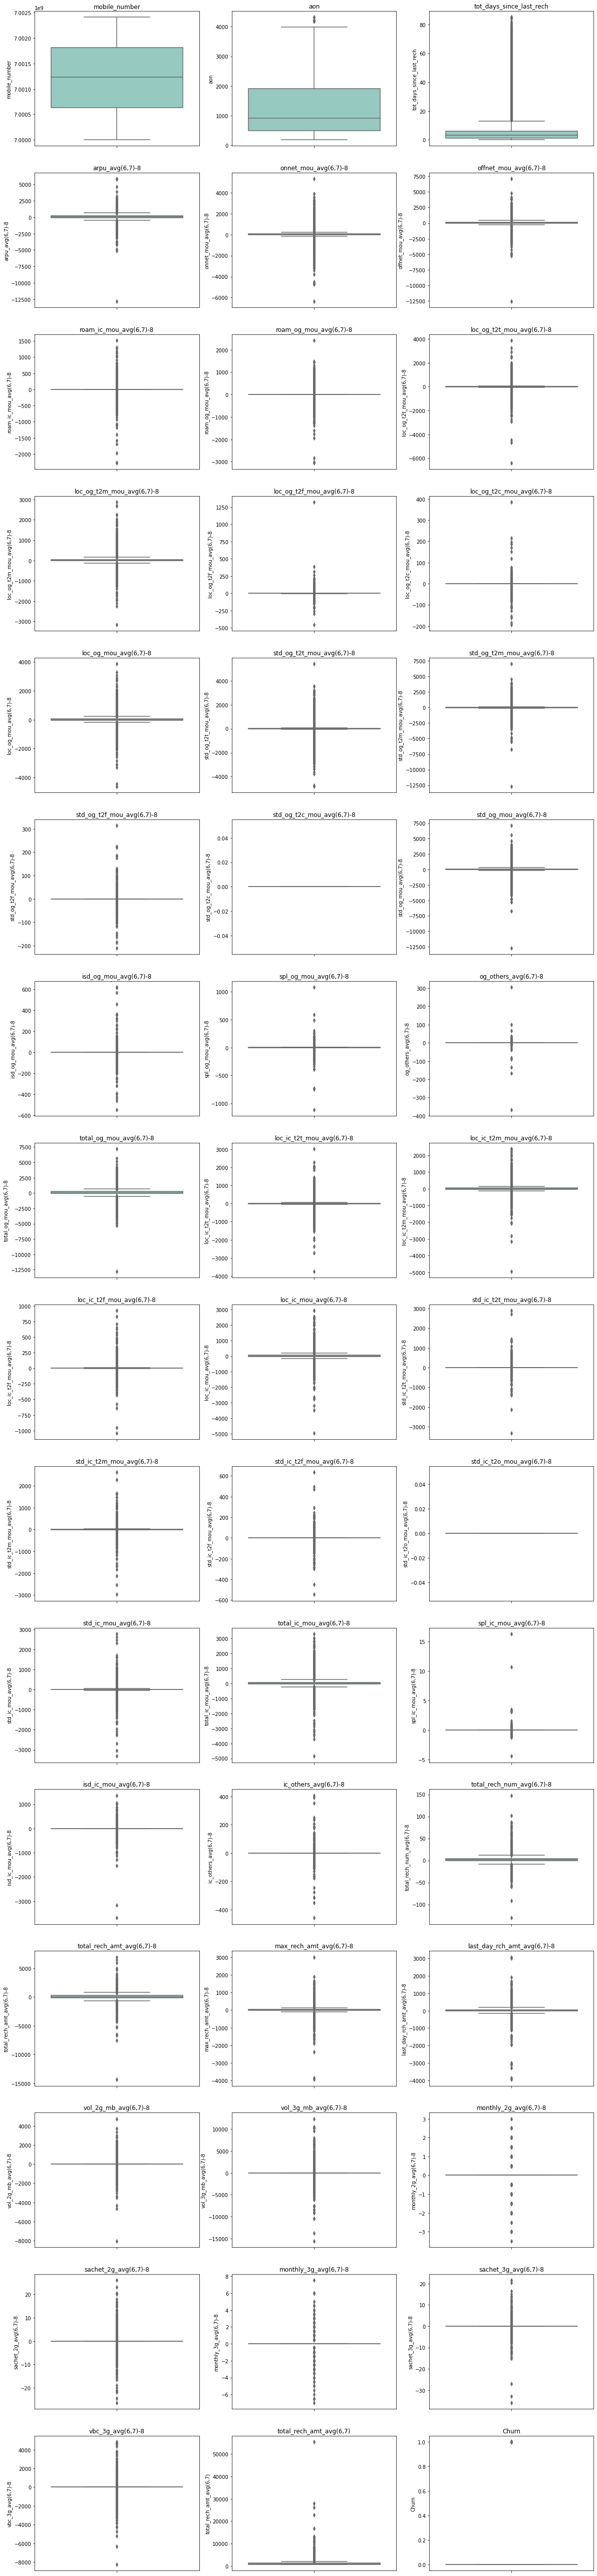

In [304]:
# Boxplot using for loop
j=1
plt.figure(figsize=(20, 100))
for i in churn_data.columns:
    plt.subplot((len(churn_data.columns)//3)+1,3,j)
    sns.boxplot(y = i, palette='Set3', data = churn_data)
    plt.title(i)
    j+=1
    

plt.show()
    


### Looking at the boxplots, it can be noticed that some of the columns have a sing value, dropping such columns

In [305]:
# columns having 0 for all the rows
print(churn_data["std_ic_t2o_mou_avg(6,7)-8"].value_counts())
print(churn_data["std_og_t2c_mou_avg(6,7)-8"].value_counts())

0.0    29961
Name: std_ic_t2o_mou_avg(6,7)-8, dtype: int64
0.0    29961
Name: std_og_t2c_mou_avg(6,7)-8, dtype: int64


In [306]:
# drop the above identified columns and "total_rech_amt_avg(6,7)" as it was added to extract high value customers
churn_data.drop(["std_ic_t2o_mou_avg(6,7)-8","std_og_t2c_mou_avg(6,7)-8","total_rech_amt_avg(6,7)"],axis=1,inplace=True)

In [307]:
# drop mobile number
churn_data.drop("mobile_number",axis=1, inplace=True)


### Handling Outliers

In [389]:
# Replace outliers by (1.5 *IQR) +(value corresponding to 75 percentile) only for columns having IQR>0
for i in churn_data.columns:
    IQR =churn_data[i].quantile(.75)-churn_data[i].quantile(.25)
    if IQR>0:
        churn_data.loc[churn_data[i]>churn_data[i].quantile(.75)+1.5*IQR,i]=churn_data[i].quantile(.75)+1.5*IQR
        churn_data.loc[churn_data[i]<churn_data[i].quantile(.25)-1.5*IQR,i]=churn_data[i].quantile(.25)-1.5*IQR


In [67]:
churn_data.shape

(29961, 44)

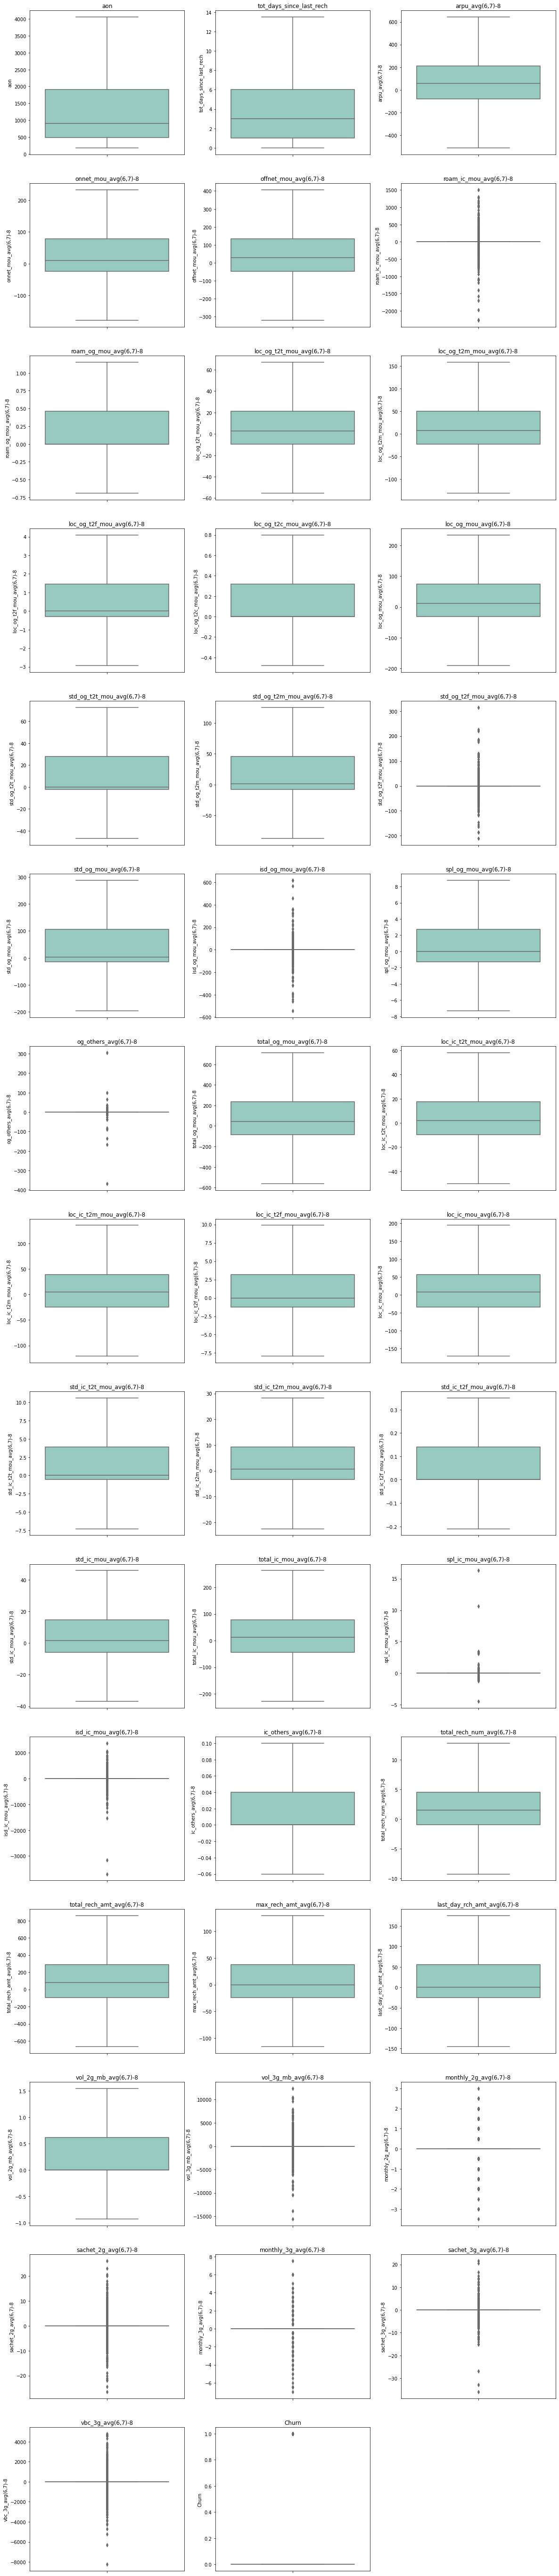

In [68]:
j=1
plt.figure(figsize=(20, 100))
for i in churn_data.columns:
    plt.subplot((len(churn_data.columns)//3)+1,3,j)
    sns.boxplot(y = i, palette='Set3', data = churn_data)
    plt.title(i)
    j+=1
    

plt.show()

<Figure size 360x1080 with 0 Axes>

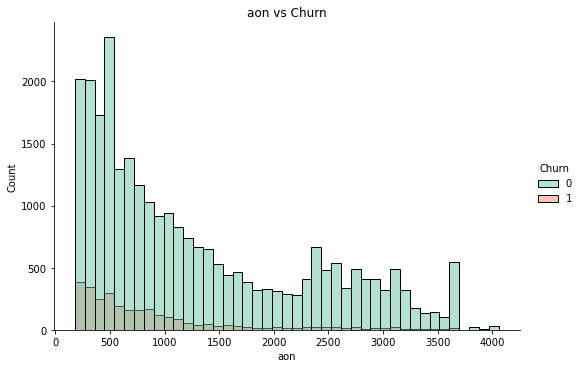

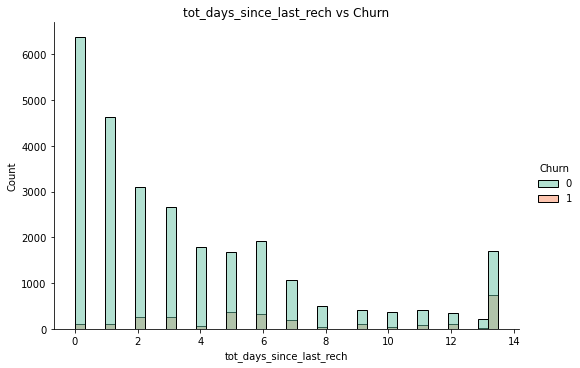

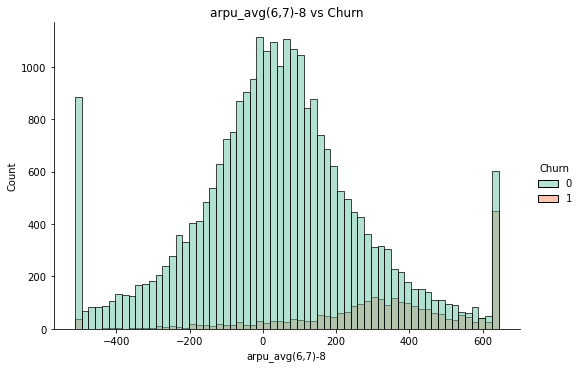

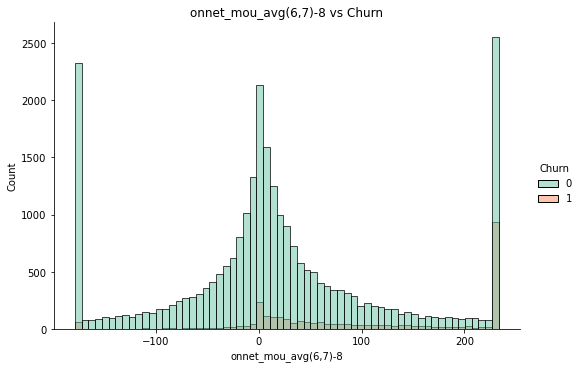

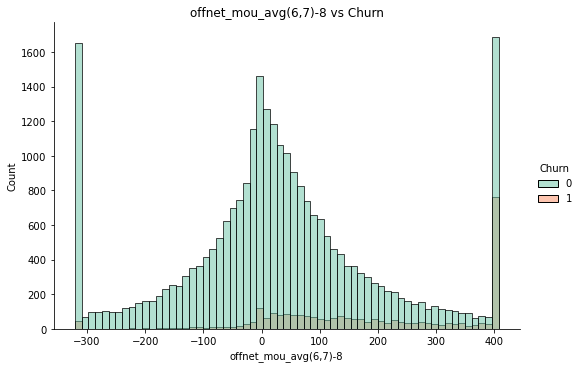

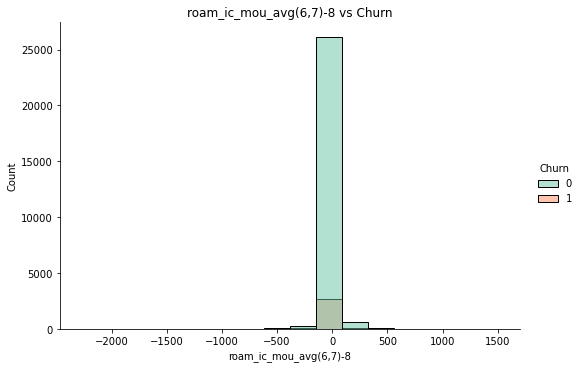

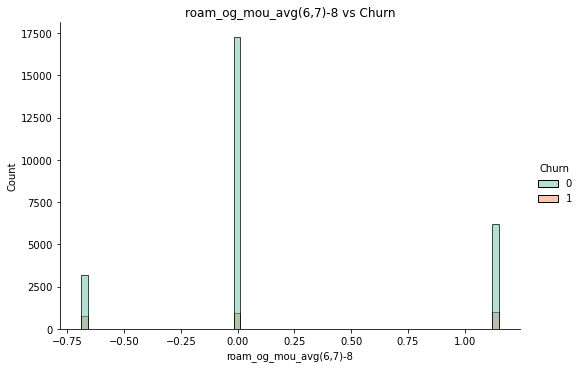

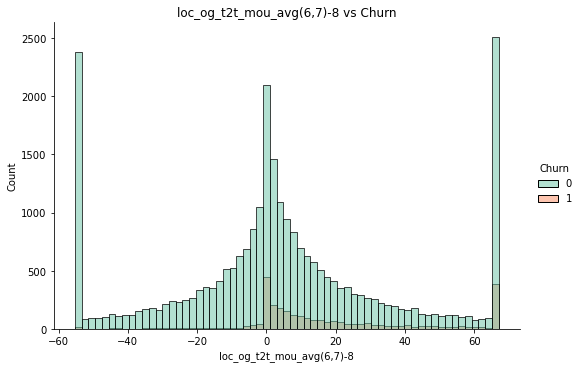

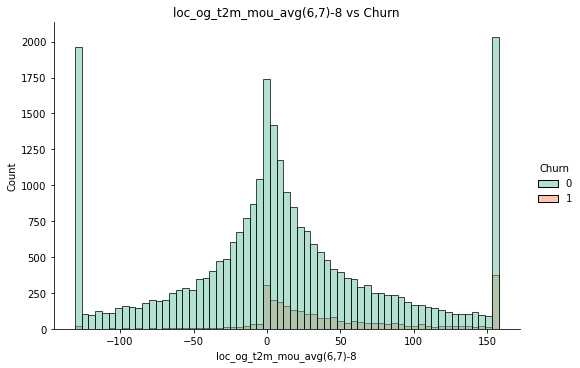

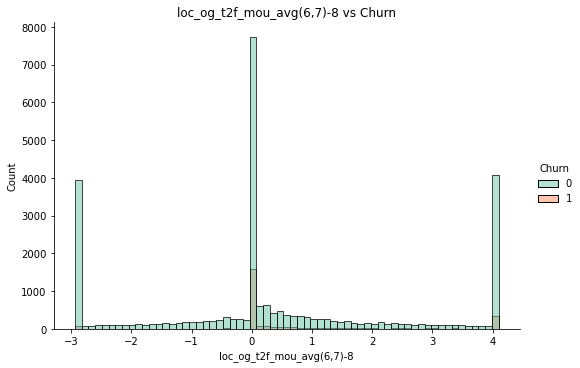

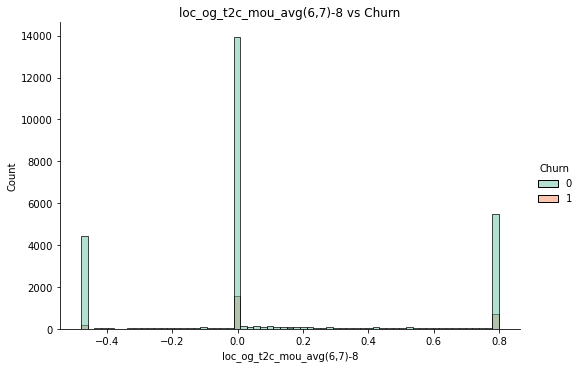

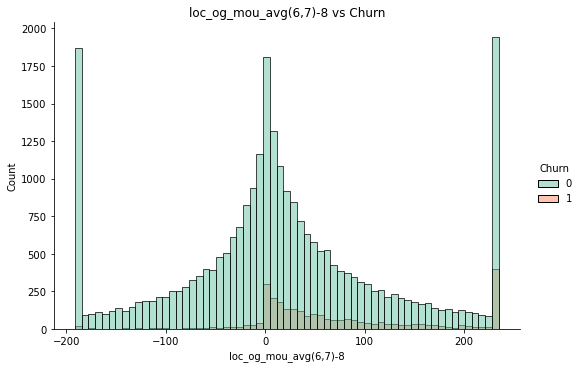

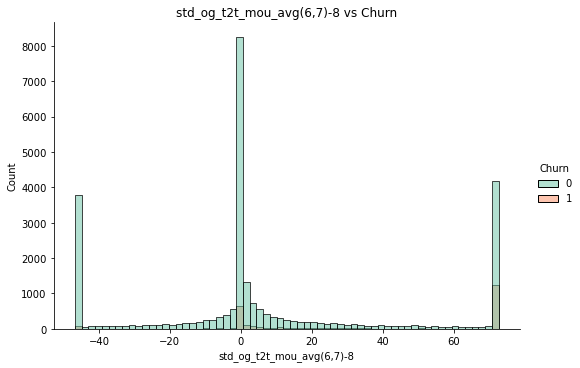

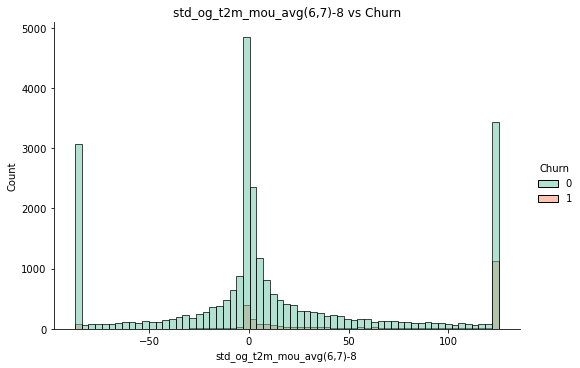

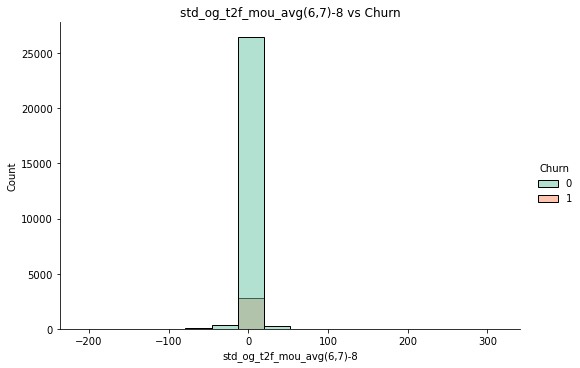

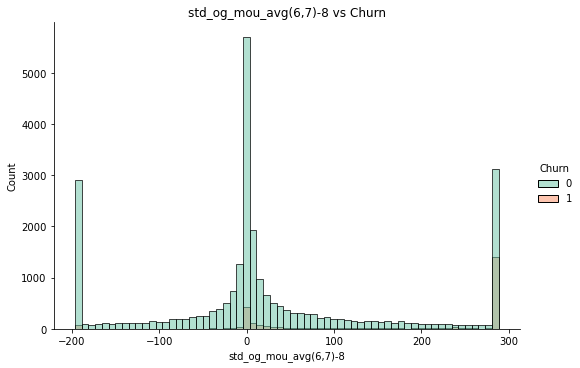

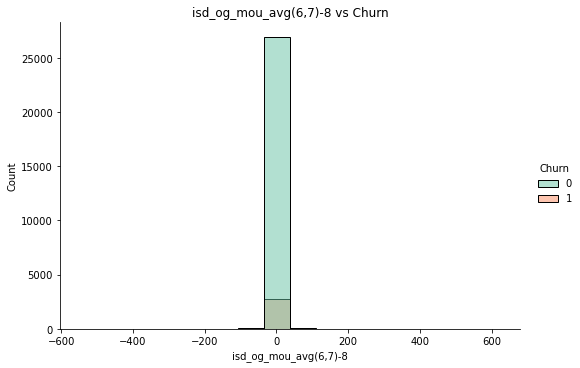

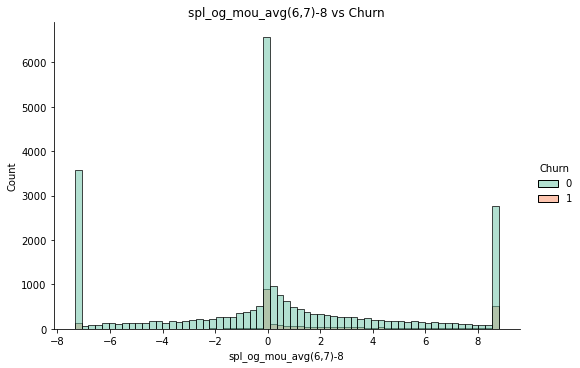

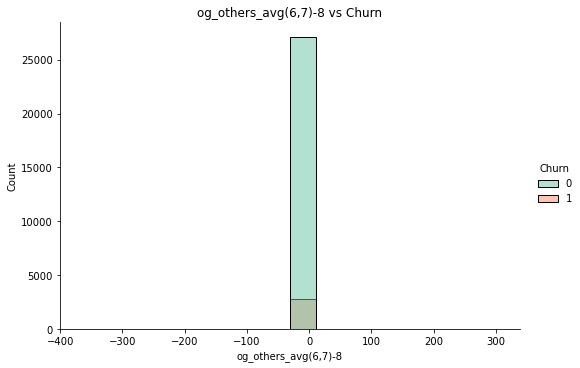

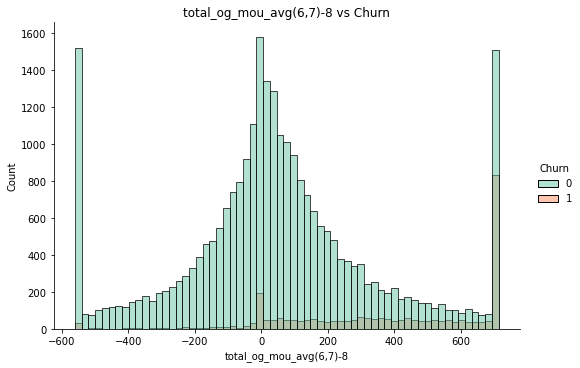

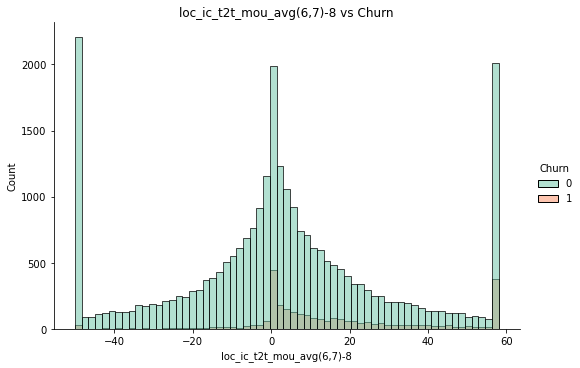

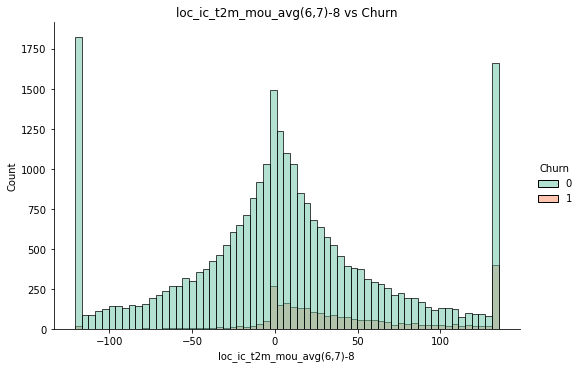

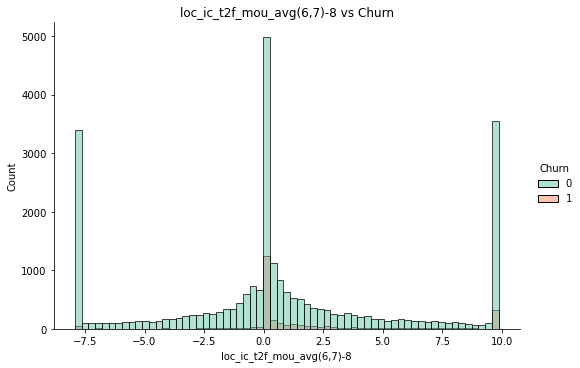

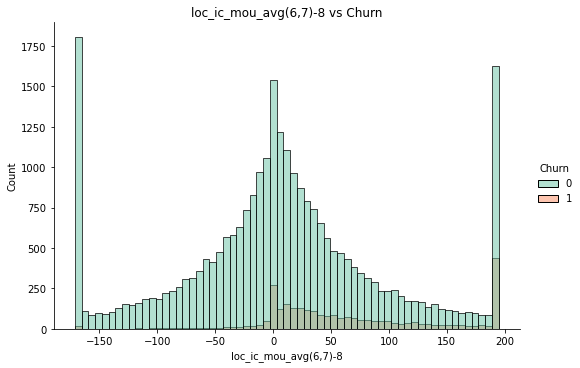

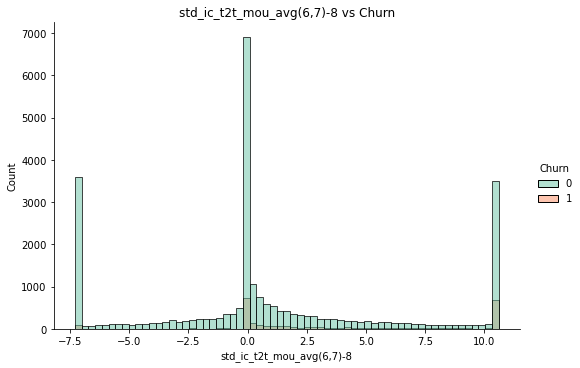

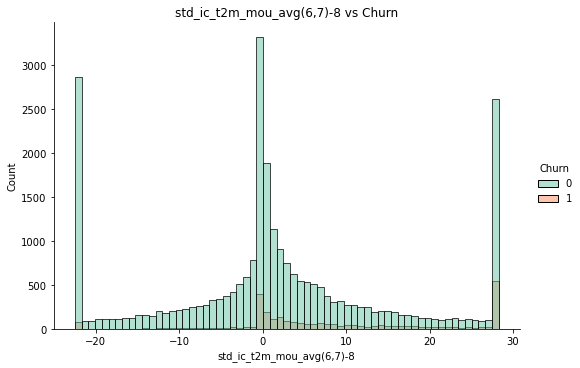

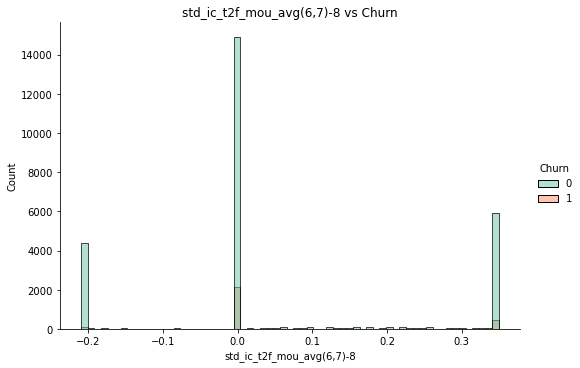

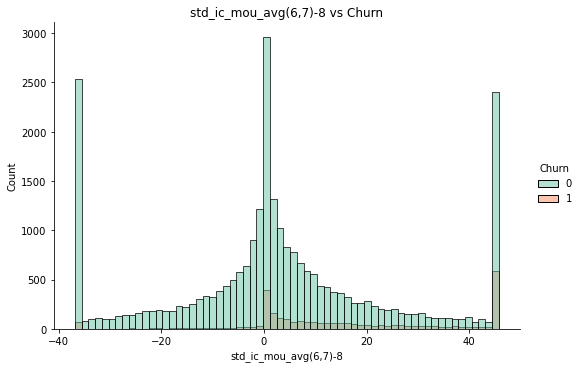

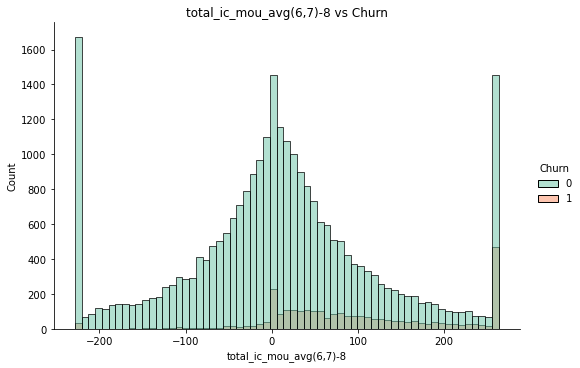

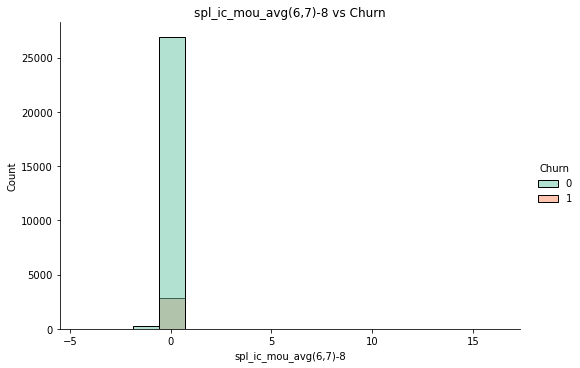

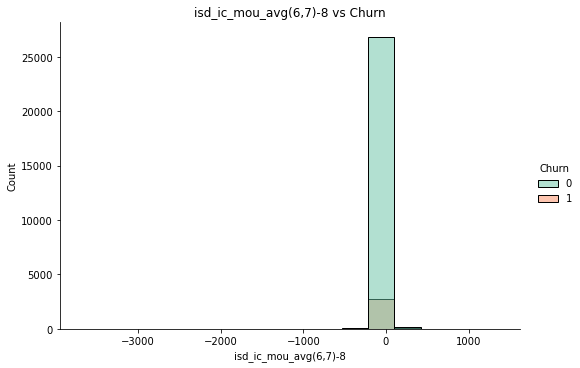

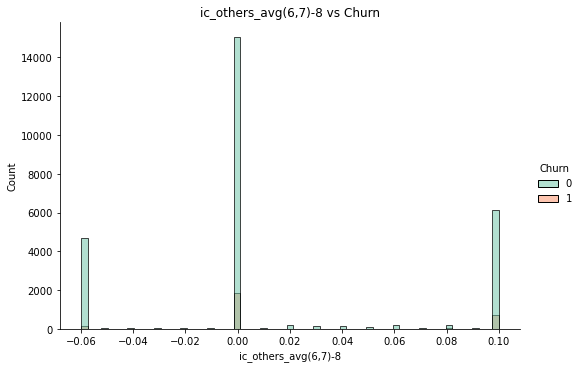

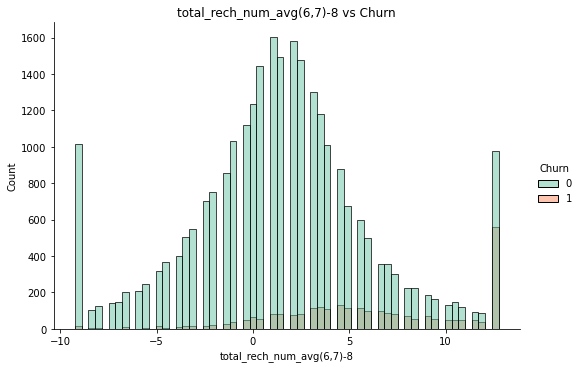

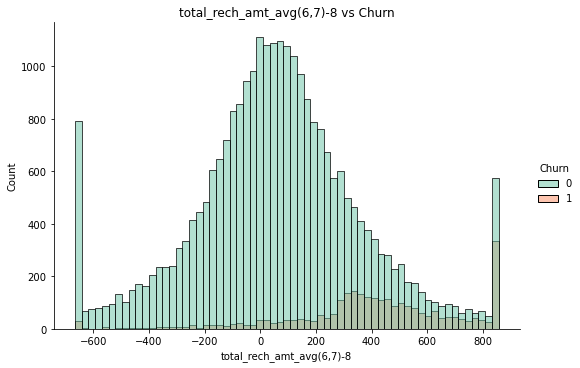

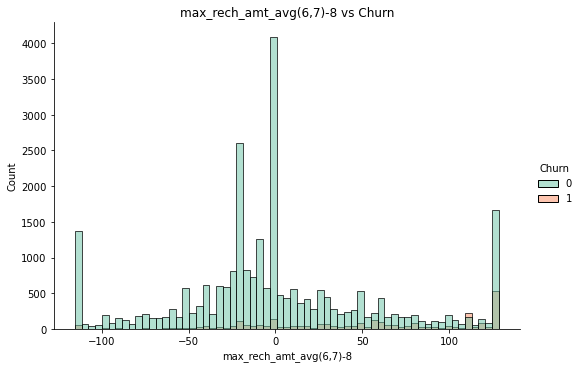

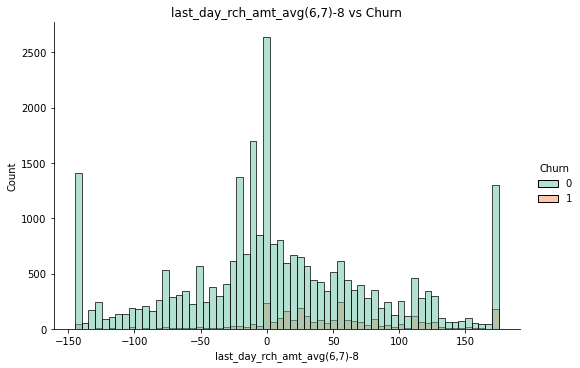

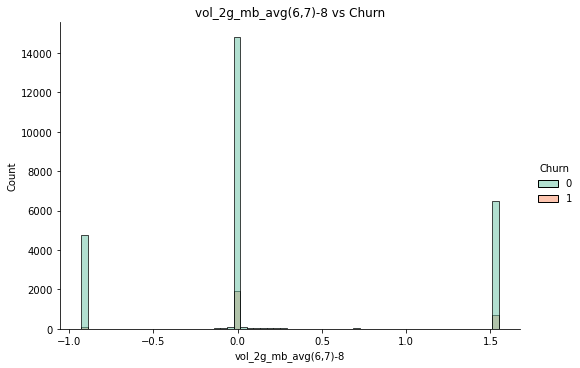

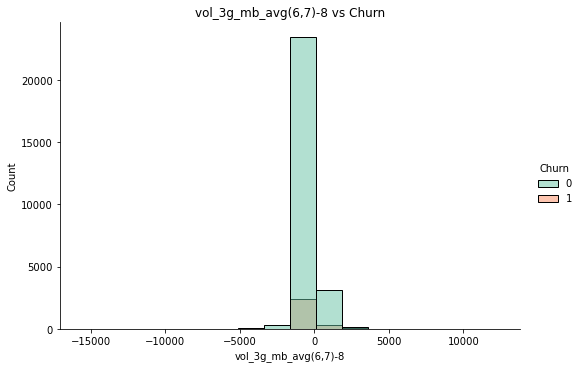

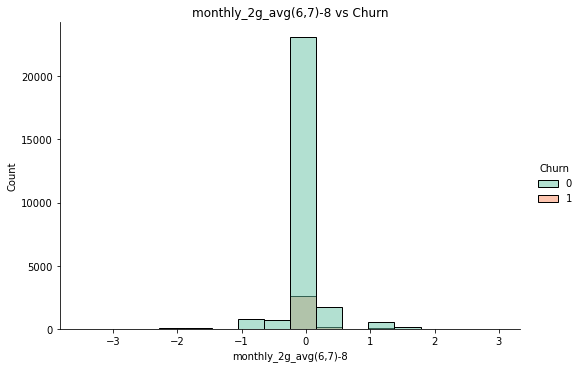

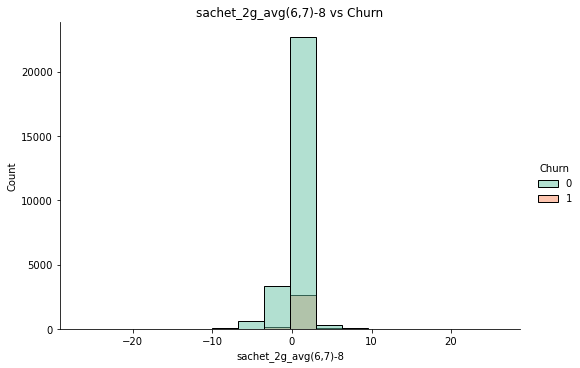

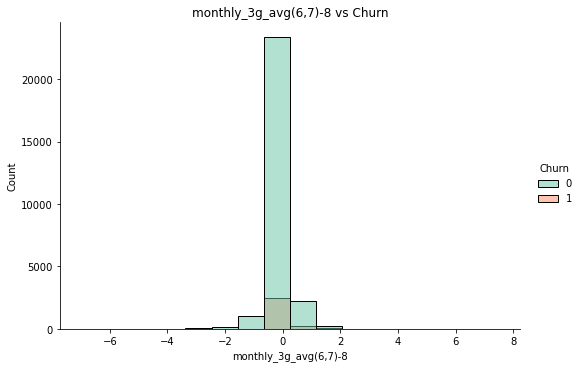

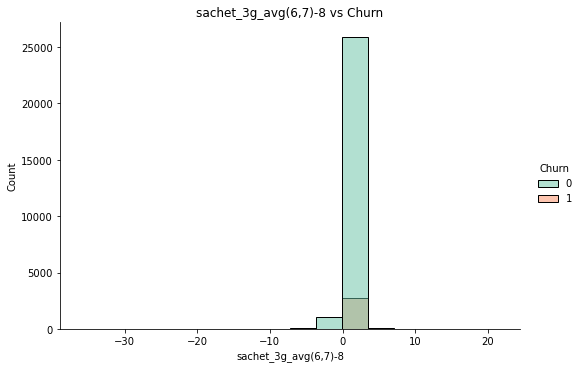

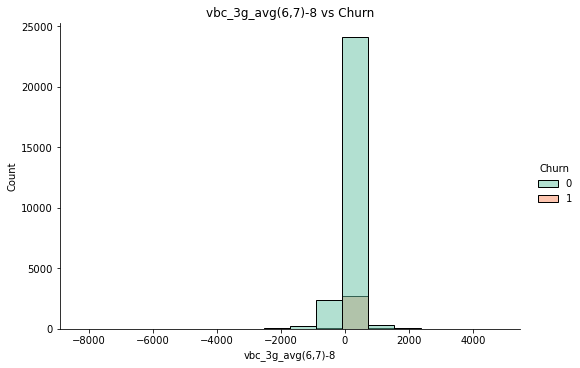

In [69]:
# Distribution Plot using for loop
col=list(churn_data.columns)
col.pop()
j=1
plt.figure(figsize=[5,15])
for i in col:
    
    sns.displot(data=churn_data,x=i,hue="Churn",palette="Set2",aspect=1.5)
    plt.title(i+" vs Churn")
    
        
    plt.show()
        
    

### Findings from EDA   
1. Number of customers on the network is steadily increasing.
2. Churn rate is higher for customers with "Age on Network is < 1000 days.
3. Churn Rate is around 40% for customers for whome total days since last recharge is grater than 13 days.
4. If average of arpu for 6th and 7th month - arpu 8th month is grater than 300 churn rate is very high
5. if average of total recharge amountfor 6th and 7th month - 8th month is grater than 300 churn rate is very high.
6. If their is a drop in outgoing calls in 8th month as compared to average outgoing for 6th and 7th month churn rate is higher.
7. If their is a drop in incoming calls in 8th month as compared to average incoming for 6th and 7th month churn rate is higher.


## Data Preprocessing

In [70]:
# Split data into X and y
X=churn_data.drop("Churn",axis=1)
y=churn_data.pop("Churn")


In [71]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
# Split the data into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=0,stratify=y)
print(X_train.shape)
print(y_train.shape)

(20972, 43)
(20972,)


In [73]:
# Distribution of target variable in test and train set
print("Target variable Distribution in train set")
print(round(y_train.value_counts()/y_train.shape[0],2))
print("********************************************")
print("Target variable Distribution in test set")
print(round(y_test.value_counts()/y_test.shape[0],2))

Target variable Distribution in train set
0    0.91
1    0.09
Name: Churn, dtype: float64
********************************************
Target variable Distribution in test set
0    0.91
1    0.09
Name: Churn, dtype: float64


In [74]:
#scaling data
scaler=MinMaxScaler()
X_train[list(X.columns)]=scaler.fit_transform(X_train)
X_test[list(X.columns)]=scaler.transform(X_test)

In [75]:
X_train.describe()

,aon,tot_days_since_last_rech,"arpu_avg(6,7)-8","onnet_mou_avg(6,7)-8","offnet_mou_avg(6,7)-8","roam_ic_mou_avg(6,7)-8","roam_og_mou_avg(6,7)-8","loc_og_t2t_mou_avg(6,7)-8","loc_og_t2m_mou_avg(6,7)-8","loc_og_t2f_mou_avg(6,7)-8","loc_og_t2c_mou_avg(6,7)-8","loc_og_mou_avg(6,7)-8","std_og_t2t_mou_avg(6,7)-8","std_og_t2m_mou_avg(6,7)-8","std_og_t2f_mou_avg(6,7)-8","std_og_mou_avg(6,7)-8","isd_og_mou_avg(6,7)-8","spl_og_mou_avg(6,7)-8","og_others_avg(6,7)-8","total_og_mou_avg(6,7)-8","loc_ic_t2t_mou_avg(6,7)-8","loc_ic_t2m_mou_avg(6,7)-8","loc_ic_t2f_mou_avg(6,7)-8","loc_ic_mou_avg(6,7)-8","std_ic_t2t_mou_avg(6,7)-8","std_ic_t2m_mou_avg(6,7)-8","std_ic_t2f_mou_avg(6,7)-8","std_ic_mou_avg(6,7)-8","total_ic_mou_avg(6,7)-8","spl_ic_mou_avg(6,7)-8","isd_ic_mou_avg(6,7)-8","ic_others_avg(6,7)-8","total_rech_num_avg(6,7)-8","total_rech_amt_avg(6,7)-8","max_rech_amt_avg(6,7)-8","last_day_rch_amt_avg(6,7)-8","vol_2g_mb_avg(6,7)-8","vol_3g_mb_avg(6,7)-8","monthly_2g_avg(6,7)-8","sachet_2g_avg(6,7)-8","monthly_3g_avg(6,7)-8","sachet_3g_avg(6,7)-8","vbc_3g_avg(6,7)-8"
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,0.277980,0.296328,0.499188,0.499875,0.501031,0.601921,0.481550,0.498582,0.498239,0.476882,0.464634,0.498511,0.476225,0.486141,0.401101,0.484077,0.404327,0.483942,0.546432,0.502039,0.497551,0.500278,0.490016,0.500412,0.477722,0.490992,0.469541,0.494732,0.499836,0.295530,0.729987,0.468404,0.503717,0.498449,0.496535,0.486407,0.467800,0.558110,0.585551,0.503669,0.464587,0.626118,0.567513
std,0.250936,0.306132,0.217671,0.269681,0.249032,0.018127,0.321625,0.265435,0.255716,0.302278,0.322946,0.253215,0.309542,0.291293,0.014972,0.290825,0.013570,0.285828,0.005880,0.246612,0.257093,0.247823,0.289217,0.247202,0.296766,0.276124,0.322198,0.269153,0.242925,0.010615,0.010850,0.328966,0.223850,0.212860,0.246478,0.237062,0.332173,0.020425,0.051429,0.027343,0.031449,0.013899,0.025640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076873,0.074074,0.374138,0.376256,0.373737,0.601269,0.375000,0.374407,0.375173,0.370739,0.375000,0.374449,0.374581,0.375930,0.400481,0.374794,0.404074,0.373759,0.545935,0.374052,0.375370,0.374063,0.374438,0.375759,0.376678,0.376329,0.375000,0.376089,0.375768,0.294507,0.729983,0.375000,0.375000,0.374343,0.375000,0.375000,0.375000,0.558164,0.583333,0.504762,0.464286,0.626087,0.567520
50%,0.186766,0.222222,0.492395,0.459846,0.477761,0.601269,0.375000,0.473970,0.477633,0.417614,0.375000,0.475626,0.391834,0.417483,0.400481,0.411629,0.404074,0.455025,0.545935,0.473408,0.482275,0.490394,0.445225,0.489594,0.407438,0.455906,0.375000,0.464969,0.488845,0.294507,0.729983,0.375000,0.488636,0.489980,0.473361,0.453125,0.375000,0.558164,0.583333,0.504762,0.464286,0.626087,0.567520
75%,0.445763,0.444444,0.624743,0.624976,0.622686,0.601269,0.657609,0.626655,0.627053,0.622159,0.625000,0.625903,0.627722,0.619772,0.400481,0.617046,0.404074,0.624380,0.545935,0.622697,0.624907,0.626064,0.627949,0.624214,0.625559,0.623622,0.625000,0.625484,0.623697,0.294507,0.729983,0.687500,0.625000,0.625329,0.622951,0.625000,0.616935,0.558164,0.583333,0.504762,0.464286,0.626087,0.567520
max,1.000000,1.00

In [76]:
#IMBALANCE TREATEMENT using SMOTE
from imblearn.over_sampling import SMOTE

In [77]:
#churn vs non churn original data
y_train.value_counts()

0    18997
1     1975
Name: Churn, dtype: int64

In [78]:
# using smote
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [79]:
#churn vs non churn after oversampling
y_train_sm.value_counts()

0    18997
1    18997
Name: Churn, dtype: int64

## Principal Component Analysis

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca=PCA(random_state=42)
pca.fit(X_train_sm)

PCA(random_state=42)

Components from PCA

In [82]:
# Principal Components
pca.components_

array([[ 6.10632289e-02, -1.66619371e-01, -2.31380239e-01, ...,
        -2.26382879e-03, -6.84560463e-04, -1.94131714e-03],
       [-9.69686120e-02, -1.82694886e-01,  8.45669456e-03, ...,
        -5.62361574e-03, -6.29362901e-04, -4.87448718e-03],
       [ 2.53021481e-02, -3.56454429e-01, -1.86589848e-01, ...,
        -1.07018998e-02, -1.62204631e-03, -6.58731476e-03],
       ...,
       [ 1.40066519e-04, -3.03103274e-04,  1.68797043e-03, ...,
         6.84829177e-02,  2.00260020e-01,  8.39600493e-02],
       [ 8.62935069e-04, -6.43187235e-04,  2.02497572e-04, ...,
        -4.11720204e-02, -1.37597469e-01, -5.41932851e-02],
       [-1.62552531e-04, -3.20870373e-04, -1.06981388e-03, ...,
        -1.12646211e-03, -2.39225950e-03, -7.93269225e-04]])

In [83]:
# % variance explaned by each component
pca.explained_variance_ratio_

array([2.98668301e-01, 9.04729513e-02, 6.92558796e-02, 5.32090883e-02,
       5.14811980e-02, 4.48623109e-02, 4.33431421e-02, 3.90190136e-02,
       3.70577269e-02, 3.39316567e-02, 2.78112083e-02, 2.75801535e-02,
       2.36254218e-02, 2.20325471e-02, 1.94009839e-02, 1.87193824e-02,
       1.80604347e-02, 1.60760514e-02, 1.45992667e-02, 1.26404462e-02,
       9.23547026e-03, 6.02973270e-03, 4.79418691e-03, 3.18686974e-03,
       3.09266494e-03, 2.82683254e-03, 1.97042124e-03, 1.93978436e-03,
       1.58208598e-03, 8.72524558e-04, 7.32435444e-04, 6.92852904e-04,
       3.33781068e-04, 2.16752092e-04, 1.63188779e-04, 1.28350089e-04,
       9.76113877e-05, 7.38943921e-05, 6.68198945e-05, 3.61131130e-05,
       3.49943533e-05, 3.44446009e-05, 1.10245889e-05])

In [84]:
# Cmulative Variance explained by PC's
var_cumu = np.cumsum(pca.explained_variance_ratio_)

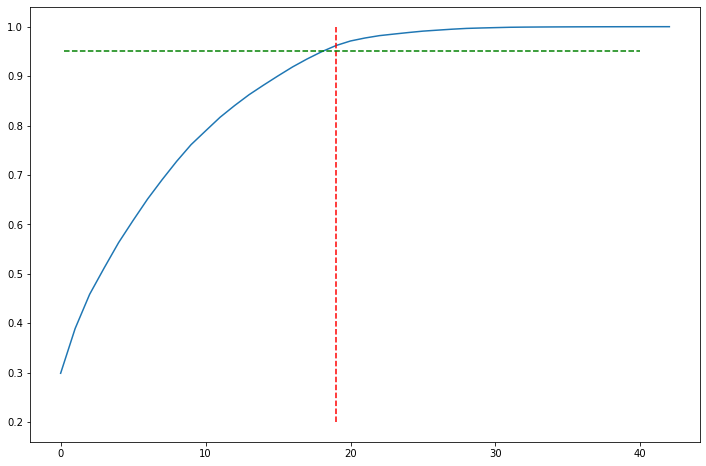

In [85]:
# plot of cumulative variance, with red vertical line showing no of PC's explaining 95% variance
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.vlines(x=19,ymax=1,ymin=.2,colors="r",linestyle="--")
plt.hlines(y=.95,xmax=40,xmin=.2,colors="g",linestyle="--")

In [86]:
# selecting 19 principal components that explain 95% of variance
pc19 = PCA(n_components=19, random_state=42)

In [87]:
# transforming the training data into principal component space
X_train_transformed=pd.DataFrame(pc19.fit_transform(X_train_sm),columns=["PC"+str(i) for i in range(1,20)])

In [88]:
X_train_transformed.shape

(37994, 19)

The features has been reduced to the 19 PC's

In [89]:
X_train_transformed.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.314526,0.143457,0.024463,0.655948,0.088322,0.462547,-0.094570,0.229545,-0.234439,0.025018,-0.177555,0.294884,-0.040240,-0.387723,-0.107896,0.087051,-0.166166,0.147651,0.248657
1,-1.045398,-0.462234,-0.511309,0.105567,0.095931,-0.741129,0.344441,0.459838,0.207367,0.327177,0.276828,-0.116325,-0.260532,-0.441536,-0.163983,0.134923,0.045686,0.092856,0.211324
2,1.861213,0.002407,-0.283105,-0.288255,0.278434,0.393257,0.281578,0.004445,0.067965,-0.137705,0.017909,0.267269,0.004053,-0.231091,0.010889,-0.339260,-0.405905,-0.247532,-0.047330
3,1.269877,0.313080,0.356748,-0.444508,0.066007,0.191385,0.065268,-0.081731,0.135193,-0.181541,-0.643817,-0.159573,-0.058547,0.338253,0.045008,-0.446779,0.058478,-0.308887,-0.039392
4,0.673444,0.266854,0.216629,-0.177357,0.523785,-0.114149,0.425669,-0.150527,0.027886,-0.083865,0.180851,0.765345,-0.038987,-0.050343,-0.257277,-0.153992,-0.038761,0.111775,-0.115908


##  Training Logistic Regression Model on data transformed using Principal Components

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr=LogisticRegression()
lr_pca_model=lr.fit(X_train_transformed,y_train_sm)

In [92]:
lr_pca_model.coef_

array([[-2.17359675,  0.16459632, -1.27174715,  0.14698833, -0.54506246,
         0.18272827, -1.58322313,  0.14137887,  0.34258014, -1.35757036,
         0.14611816, -0.92757609, -1.08097819, -0.27415016, -1.203792  ,
        -1.42899187, -0.42759078,  0.28226468, -0.42720075]])

In [93]:
# Crerating Dataframe of coefficents
PCA_19=pd.DataFrame({"PC":lr_pca_model.feature_names_in_,"coeff":lr_pca_model.coef_.reshape(-1)})
print("intercept:",lr_pca_model.intercept_)
print("*******************")
PCA_19

intercept: [-0.04071996]
*******************


,PC,coeff
0,PC1,-2.173597
1,PC2,0.164596
2,PC3,-1.271747
3,PC4,0.146988
4,PC5,-0.545062
5,PC6,0.182728
6,PC7,-1.583223
7,PC8,0.141379
8,PC9,0.342580
9,PC10,-1.357570


In [94]:
# prediction on training data
X_train_Predictions=lr_pca_model.predict(X_train_transformed)

In [95]:
from sklearn import metrics

In [96]:
# confusion matrix train
confusion = metrics.confusion_matrix(y_train_sm, X_train_Predictions )
confusion

array([[15582,  3415],
       [ 3190, 15807]], dtype=int64)

In [97]:
# transforming test data
X_test_transformed=pc19.transform(X_test)

In [98]:
# prediction on test data
X_test_Predictions=lr_pca_model.predict(X_test_transformed)

In [99]:
# confusion matrix Test
confusion_test = metrics.confusion_matrix(y_test, X_test_Predictions )
confusion_test

array([[6679, 1464],
       [ 160,  686]], dtype=int64)

In [100]:
# Training set  Accuracy
metrics.accuracy_score(y_train_sm, X_train_Predictions)

0.8261567615939359

In [101]:
# Test set Accuracy
metrics.accuracy_score(y_test, X_test_Predictions)

0.8193347424630103

In [102]:
# Precession and Recall for training and test set
print("Precession Train:",confusion[1,1]/(confusion[1,1]+confusion[0,1]))
print("Recall Train:",confusion[1,1]/(confusion[1,1]+confusion[1,0]))
print("*********************************")
      
print("Precession Test:",confusion_test[1,1]/(confusion_test[1,1]+confusion_test[0,1]))
print("Recall Test:",confusion_test[1,1]/(confusion_test[1,1]+confusion_test[1,0]))
      

Precession Train: 0.8223389865778795
Recall Train: 0.8320787492762015
*********************************
Precession Test: 0.31906976744186044
Recall Test: 0.8108747044917257


Accuracy of both training and test set is close to 82%, no ovrfitting.  
Recall of both training and test is also close to 82%.  
Precession is dropping from 82% on train to 31% on test. 

## PLotting ROC for Training Set

In [103]:
# function to plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
# transforming train data to PC19's space
coeff=lr_pca_model.coef_.reshape(-1,1)
intercept=lr_pca_model.intercept_
x_train_trf=pc19.fit_transform(X_train_sm)
print(coeff.shape)
print(x_train_trf.shape)

(19, 1)
(37994, 19)


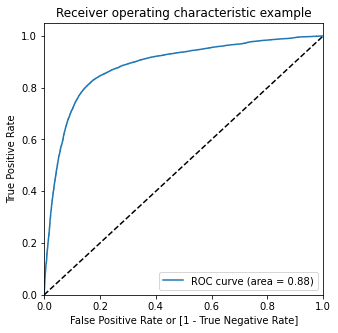

In [105]:
# Finding Probabilities predicted by "lr_pca_model"
# logits 
logit=np.matmul(x_train_trf,coeff)+intercept
# using sigmoid function on logits to find probabilities
Proba_pca=1/(1+np.exp(-1*logit))
# Draw ROC curve
draw_roc( y_train_sm, Proba_pca )

88% area under curve is good

In [106]:
# Creating a Datarane of Predicted Probabilities and Target variable

Proba_pca= Proba_pca.reshape(-1)
Train_proba = pd.DataFrame({'Churn':y_train_sm, 'LR Probabilities':Proba_pca})

Train_proba.head()

,Churn,LR Probabilities
0,0,0.667843
1,1,0.904832
2,0,0.024753
3,0,0.070558
4,0,0.066579


## Finding Optimal Cutoff Point

In [107]:
# Finding Predictions for diffrent cutoff.
# Adding the Predictions for diffrent cutoff to the above data frame

for i in [float(x)/10 for x in range(10)]:
    Train_proba[i]= Train_proba["LR Probabilities"].map(lambda x: 1 if x > i else 0)
Train_proba.head()

,Churn,LR Probabilities,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.667843,1,1,1,1,1,1,1,0,0,0
1,1,0.904832,1,1,1,1,1,1,1,1,1,1
2,0,0.024753,1,0,0,0,0,0,0,0,0,0
3,0,0.070558,1,0,0,0,0,0,0,0,0,0
4,0,0.066579,1,0,0,0,0,0,0,0,0,0


In [108]:
# Now let's calculate accuracy precession and recall for various probability cutoffs.
# create a cutoff_dataframe containingk metrics at diffrent cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Train_proba.Churn, Train_proba[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.640206  0.967732  0.312681
0.2   0.2  0.732063  0.933779  0.530347
0.3   0.3  0.782860  0.905827  0.659894
0.4   0.4  0.811812  0.871243  0.752382
0.5   0.5  0.826157  0.832079  0.820235
0.6   0.6  0.823051  0.773648  0.872454
0.7   0.7  0.798126  0.684529  0.911723
0.8   0.8  0.744644  0.544033  0.945255
0.9   0.9  0.631626  0.284150  0.979102


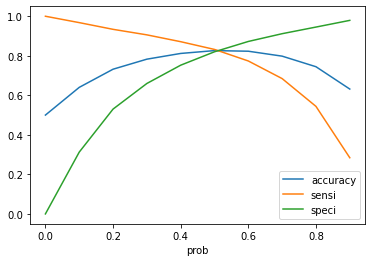

In [109]:
# Plotting Accuracy, Sensitivity and Specivicity to find optimal cutoff.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

In [110]:
# optimal value is around .5
Train_proba["optimal"]= Train_proba["LR Probabilities"].map(lambda x: 1 if x > .5 else 0)

cm1 = metrics.confusion_matrix(Train_proba.Churn, Train_proba["optimal"] )
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
speci= cm1[0,0]/(cm1[0,0]+cm1[0,1])
recall=cm1[1,1]/(cm1[1,0]+cm1[1,1])
precession=cm1[1,1]/(cm1[0,1]+cm1[1,1])
print("for cutoff of .50")
print("accuracy:",accuracy)
print("recall:",recall)
print("specivity",speci)
print("precession",precession)
print("confusion matrix :\n",cm1)


for cutoff of .50
accuracy: 0.8261567615939359
recall: 0.8320787492762015
specivity 0.8202347739116702
precession 0.8223389865778795
confusion matrix :
 [[15582  3415]
 [ 3190 15807]]


In [111]:
# Test set metrics for .5 cutoff
logit_test=np.matmul(X_test_transformed,coeff)+intercept
Proba_pca_test=1/(1+np.exp(-1*logit))
test_pred_1= [1  if i>.50 else 0 for i in list(logit_test)]
cm1 = metrics.confusion_matrix(y_test, test_pred_1 )
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
speci= cm1[0,0]/(cm1[0,0]+cm1[0,1])
recall=cm1[1,1]/(cm1[1,0]+cm1[1,1])
precession=cm1[1,1]/(cm1[0,1]+cm1[1,1])
print("for cutoff of .50")
print("accuracy:",accuracy)
print("recall:",recall)
print("specivity",speci)
print("precession",precession)
print("confusion matrix :\n",cm1)




for cutoff of .50
accuracy: 0.8676159750806541
recall: 0.7375886524822695
specivity 0.8811248925457448
precession 0.39195979899497485
confusion matrix :
 [[7175  968]
 [ 222  624]]


Recall has fallen from 82% on train to 73% on test
Precession has fallen from 82% on train to 39% on test

## Random Forest with PCA

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
# simple randomforest model
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [114]:
rf.fit(X_train_transformed, y_train_sm)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [115]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [116]:
sample_tree = rf.estimators_[4]

In [117]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [118]:
# function to plot random forest tree
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train_transformed.columns, 
                    class_names=['Churn', "Non Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

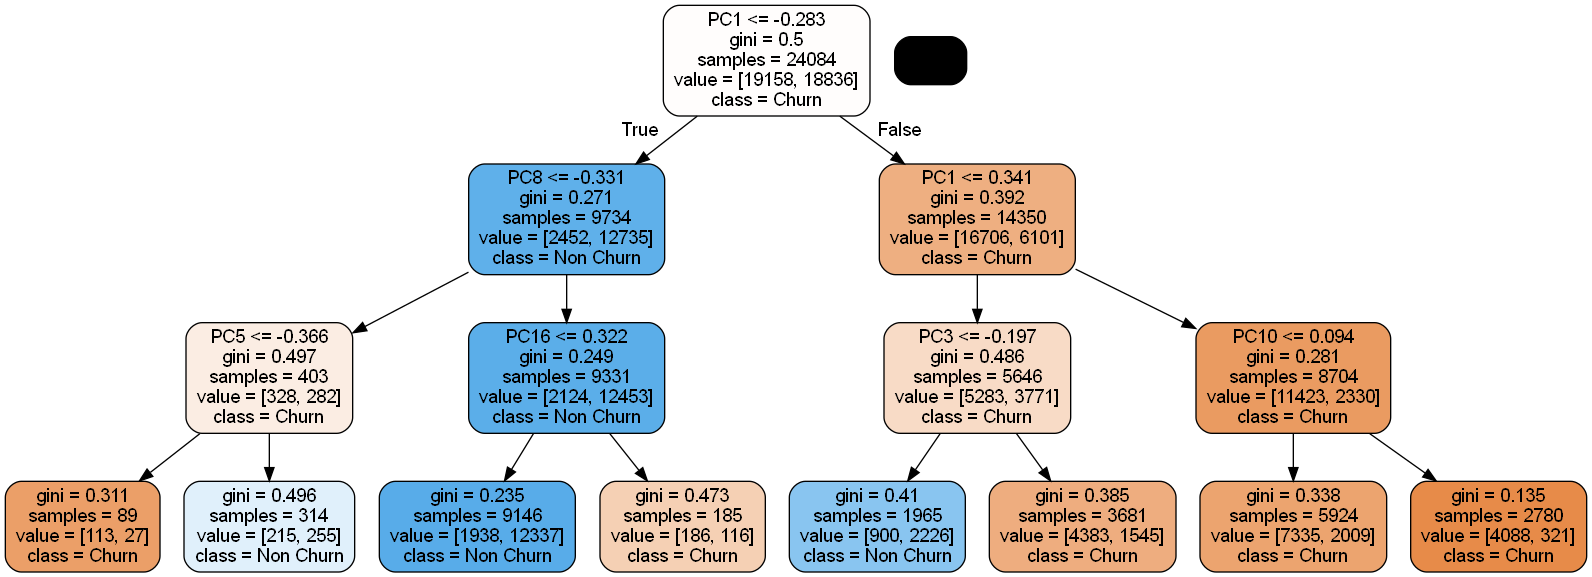

In [119]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

In [120]:
# function for plotting metrics.
def metric(actual,pred):
    cm1 = metrics.confusion_matrix(actual,pred)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci= cm1[0,0]/(cm1[0,0]+cm1[0,1])
    recall=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precession=cm1[1,1]/(cm1[0,1]+cm1[1,1])
    print("accuracy:",accuracy)
    print("recall:",recall)
    print("specivity",speci)
    print("precession",precession)
    print("confusion matrix :\n",cm1)

In [121]:
# prediction using rf on train data
rf_predictions=rf.predict(X_train_transformed)

In [122]:
metric(y_train_sm,rf_predictions)

accuracy: 0.8126809496236248
recall: 0.8583986945307154
specivity 0.7669632047165342
precession 0.7864859650815086
confusion matrix :
 [[14570  4427]
 [ 2690 16307]]


In [123]:
# Accuracy of 79% and Recall of 84 % is good for a basic randomforest model

### Grid search for hyper-parameter tuning

In [124]:
# randomforest classifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [125]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [3,5,7],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,5,10,20],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [126]:
from sklearn.model_selection import GridSearchCV

In [157]:
# Instantiate the grid search model
grid_search = GridSearchCV(classifier_rf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [158]:
%%time
# fit transformed training data using gridsearch
grid_search.fit(X_train_transformed, y_train_sm)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
CPU times: total: 29.7 s
Wall time: 6h 31min 56s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [159]:
# Best Random forest model
rf_best = grid_search.best_estimator_
rf_best 

RandomForestClassifier(max_depth=7, max_features=2, min_samples_leaf=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [160]:
Parameters of best model
grid_search.best_params_

{'max_depth': 7,
 'max_features': 2,
 'min_samples_leaf': 10,
 'n_estimators': 200}

In [161]:
# Prediction of best Randomforest model on train set
rf_best_pred=rf_best.predict(X_train_transformed)

In [162]:
# training set metrics
metric(y_train_sm,rf_best_pred)

accuracy: 0.8779017739643101
recall: 0.8719797862820445
specivity 0.8838237616465757
precession 0.8824312806307266
confusion matrix :
 [[16790  2207]
 [ 2432 16565]]


In [163]:
# Prediction on test set 
rf_test_pred=rf_best.predict(X_test_transformed)

In [164]:
# test set metrics
metric(y_test,rf_test_pred)

accuracy: 0.8640560685282012
recall: 0.7801418439716312
specivity 0.8727741618568096
precession 0.3891509433962264
confusion matrix :
 [[7107 1036]
 [ 186  660]]


## Logistic Regression Model for Identifying Features

In [165]:
import statsmodels.api as sm

In [166]:
# building first model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
smdl=logm1.fit()
smdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37994
Model:                            GLM   Df Residuals:                    37950
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16034.
Date:                Tue, 25 Apr 2023   Deviance:                       32068.
Time:                        09:50:04   Pearson chi2:                 4.36e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4186
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -21.1373      2.961     -7.139      0.000     -26.941     -15.334
aon                            -2.3022      0.072    -31.858      0.000      -2.444      -2.161
tot_days_since_last_rech        2.0696      0.049     42.238      0.000       1.974       2.166
arpu_avg(6,7)-8                 1.7048      0.152     11.193      0.000       1.406       2.003
onnet_mou_avg(6,7)-8            0.6305      0.140      4.490      0.000       0.355       0.906
offnet_mou_avg(6,7)-8           1.3154      0.162      8.143      0.000       0.999       1.632
roam_ic_mou_avg(6,7)-8          1.1949      0.745      1.604      0.109      -0.265       2.655
roam_og_mou_avg(6,7)-8         -0.2406      0.045     -5.327      0.000      -0.329      -0.152
loc_og_t2t_mou_avg(6,7)-8       0.1369      0.125      1.096      0.273      -0.108       0.382
loc_og_t2m_mou_avg(6,7)-8      -0.3054      0.197     -1.549      0.121      -0.692       0.081
loc_og_t2f_mou_avg(6,7)-8      -0.1088      0.060     -1.800      0.072      -0.227       0.010
loc_og_t2c_mou_avg(6,7)-8      -0.1679      0.056     -3.020      0.003      -0.277      -0.059
loc_og_mou_avg(6,7)-8          -1.0213      0.252     -4.050      0.000      -1.516      -0.527
std_og_t2t_mou_avg(6,7)-8       0.0830      0.105      0.793      0.428      -0.122       0.288
std_og_t2m_mou_avg(6,7)-8      -0.2516      0.118     -2.140      0.032      -0.482      -0.021
std_og_t2f_mou_avg(6,7)-8      -1.1007      1.138     -0.967      0.334      -3.332       1.130
std_og_mou_avg(6,7)-8           1.1779      0.166      7.082      0.000       0.852       1.504
isd_og_mou_avg(6,7)-8           3.9195      1.479      2.650      0.008       1.020       6.819
spl_og_mou_avg(6,7)-8           0.3002      0.068      4.428      0.000       0.167       0.433
og_others_avg(6,7)-8           -8.0359      3.352     -2.397      0.017     -14.605      -1.466
total_og_mou_avg(6,7)-8        -0.2670      0.204     -1.311      0.190      -0.666       0.132
loc_ic_t2t_mou_avg(6,7)-8       0.4663      0.117      3.997      0.000       0.238       0.695
loc_ic_t2m_mou_avg(6,7)-8       1.3102      0.182      7.218      0.000       0.954       1.666
loc_ic_t2f_mou_avg(6,7)-8      -0.1890      0.067     -2.824      0.005      -0.320      -0.058
loc_ic_mou_avg(6,7)-8           0.6795      0.296      2.296      0.022       0.099       1.260
std_ic_t2t_mou_avg(6,7)-8       0.0852      0.078      1.092      0.275      -0.068       0.238
std_ic_t2m_mou_avg(6,7)-8       0.0322      0.125      0.257      0.797      -0.213       0.277
std_ic_t2f_mou_avg(6,7)-8      -0.3622      0.054     -6.657      0.000      -0.469      -0.256
std_ic_mou_avg(6,7)-8           0.7014      0.167      4.205      0.000       0.374       1.028
total_ic_mo

### Many of the variabels are having high significance level so reducing the no of features using RFE to 10

In [346]:
# Logistic regression model
logreg = LogisticRegression()

In [347]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train_sm, y_train_sm)

In [348]:
# RFE Rankings
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('aon', True, 1),
 ('tot_days_since_last_rech', True, 1),
 ('arpu_avg(6,7)-8', True, 1),
 ('onnet_mou_avg(6,7)-8', False, 10),
 ('offnet_mou_avg(6,7)-8', False, 9),
 ('roam_ic_mou_avg(6,7)-8', False, 15),
 ('roam_og_mou_avg(6,7)-8', False, 16),
 ('loc_og_t2t_mou_avg(6,7)-8', False, 30),
 ('loc_og_t2m_mou_avg(6,7)-8', False, 14),
 ('loc_og_t2f_mou_avg(6,7)-8', False, 31),
 ('loc_og_t2c_mou_avg(6,7)-8', False, 23),
 ('loc_og_mou_avg(6,7)-8', False, 8),
 ('std_og_t2t_mou_avg(6,7)-8', False, 24),
 ('std_og_t2m_mou_avg(6,7)-8', False, 18),
 ('std_og_t2f_mou_avg(6,7)-8', False, 17),
 ('std_og_mou_avg(6,7)-8', True, 1),
 ('isd_og_mou_avg(6,7)-8', False, 2),
 ('spl_og_mou_avg(6,7)-8', False, 20),
 ('og_others_avg(6,7)-8', False, 4),
 ('total_og_mou_avg(6,7)-8', False, 19),
 ('loc_ic_t2t_mou_avg(6,7)-8', False, 7),
 ('loc_ic_t2m_mou_avg(6,7)-8', True, 1),
 ('loc_ic_t2f_mou_avg(6,7)-8', False, 22),
 ('loc_ic_mou_avg(6,7)-8', False, 33),
 ('std_ic_t2t_mou_avg(6,7)-8', False, 26),
 ('std_ic_t2m_m

In [349]:
# Extracting the features selected by RFE to a list 
col = X_train_sm.columns[rfe.support_]

In [350]:
# Modified training set with features selected by RFE
X_train_lr=X_train_sm[col]

## Manual Feature Elimination

In [351]:
# fitting on train set
X_train_lr = sm.add_constant(X_train_lr)
logm2 = sm.GLM(y_train_sm,X_train_lr, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37994
Model:                            GLM   Df Residuals:                    37983
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16531.
Date:                Wed, 26 Apr 2023   Deviance:                       33062.
Time:                        13:25:47   Pearson chi2:                 4.37e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -23.0489      1.696    -13.593      0.000     -26.372     -19.725
aon                            -2.4904      0.070    -35.426      0.000      -2.628      -2.353
tot_days_since_last_rech        2.2200      0.046     47.847      0.000       2.129       2.311
arpu_avg(6,7)-8                 2.2586      0.086     26.155      0.000       2.089       2.428
std_og_mou_avg(6,7)-8           1.9737      0.054     36.352      0.000       1.867       2.080
loc_ic_t2m_mou_avg(6,7)-8       1.5466      0.068     22.637      0.000       1.413       1.680
spl_ic_mou_avg(6,7)-8           6.6597      1.572      4.237      0.000       3.579       9.740
isd_ic_mou_avg(6,7)-8          14.2384      2.092      6.807      0.000      10.139      18.338
last_day_rch_amt_avg(6,7)-8     1.8501      0.067     27.550      0.000       1.718       1.982
vol_3g_mb_avg(6,7)-8            6.3451      0.935      6.787      0.000       4.513       8.178
sachet_2g_avg(6,7)-8            4.5435      0.607      7.484      0.000       3.354       5.733
===============================================================================================
"""

In [352]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [353]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col].values, i) for i in range(X_train_lr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,"isd_ic_mou_avg(6,7)-8",1812.87
8,"vol_3g_mb_avg(6,7)-8",991.02
5,"spl_ic_mou_avg(6,7)-8",963.06
9,"sachet_2g_avg(6,7)-8",451.46
2,"arpu_avg(6,7)-8",16.28
4,"loc_ic_t2m_mou_avg(6,7)-8",8.55
7,"last_day_rch_amt_avg(6,7)-8",8.09
3,"std_og_mou_avg(6,7)-8",7.30
1,tot_days_since_last_rech,3.00
0,aon,2.18


In [354]:
# VIF very high for some variabels, drop feature with max VIF 
col = col.drop("isd_ic_mou_avg(6,7)-8")

In [355]:
# fitting on train set after dropping max vif feature
X_train_lr = sm.add_constant(X_train_lr[col])
logm2 = sm.GLM(y_train_sm,X_train_lr, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37994
Model:                            GLM   Df Residuals:                    37984
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16557.
Date:                Wed, 26 Apr 2023   Deviance:                       33115.
Time:                        13:25:48   Pearson chi2:                 4.38e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -12.7218      0.755    -16.851      0.000     -14.202     -11.242
aon                            -2.4811      0.070    -35.361      0.000      -2.619      -2.344
tot_days_since_last_rech        2.2235      0.046     47.958      0.000       2.133       2.314
arpu_avg(6,7)-8                 2.2955      0.086     26.650      0.000       2.127       2.464
std_og_mou_avg(6,7)-8           1.9606      0.054     36.186      0.000       1.854       2.067
loc_ic_t2m_mou_avg(6,7)-8       1.5786      0.068     23.158      0.000       1.445       1.712
spl_ic_mou_avg(6,7)-8           6.7611      1.580      4.279      0.000       3.664       9.858
last_day_rch_amt_avg(6,7)-8     1.8593      0.067     27.737      0.000       1.728       1.991
vol_3g_mb_avg(6,7)-8            6.3510      0.933      6.805      0.000       4.522       8.180
sachet_2g_avg(6,7)-8            4.5487      0.606      7.511      0.000       3.362       5.736
===============================================================================================
"""

In [356]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col].values, i) for i in range(X_train_lr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,"vol_3g_mb_avg(6,7)-8",677.10
5,"spl_ic_mou_avg(6,7)-8",631.31
8,"sachet_2g_avg(6,7)-8",407.46
2,"arpu_avg(6,7)-8",16.06
4,"loc_ic_t2m_mou_avg(6,7)-8",8.52
6,"last_day_rch_amt_avg(6,7)-8",8.07
3,"std_og_mou_avg(6,7)-8",7.25
1,tot_days_since_last_rech,3.00
0,aon,2.18


In [357]:
# Drop feature with max vif
col = col.drop("vol_3g_mb_avg(6,7)-8")

In [358]:
# fitting on train set after dropping max vif feature
X_train_lr = sm.add_constant(X_train_lr[col])
logm2 = sm.GLM(y_train_sm,X_train_lr, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37994
Model:                            GLM   Df Residuals:                    37985
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16582.
Date:                Wed, 26 Apr 2023   Deviance:                       33164.
Time:                        13:25:49   Pearson chi2:                 4.38e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4016
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.2888      0.560    -16.584      0.000     -10.387      -8.191
aon                            -2.4869      0.070    -35.478      0.000      -2.624      -2.350
tot_days_since_last_rech        2.2241      0.046     48.022      0.000       2.133       2.315
arpu_avg(6,7)-8                 2.4333      0.084     28.986      0.000       2.269       2.598
std_og_mou_avg(6,7)-8           1.8945      0.053     35.571      0.000       1.790       1.999
loc_ic_t2m_mou_avg(6,7)-8       1.5580      0.068     22.904      0.000       1.425       1.691
spl_ic_mou_avg(6,7)-8           6.6550      1.585      4.197      0.000       3.547       9.762
last_day_rch_amt_avg(6,7)-8     1.8773      0.067     28.112      0.000       1.746       2.008
sachet_2g_avg(6,7)-8            4.7795      0.604      7.914      0.000       3.596       5.963
===============================================================================================
"""

In [359]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col].values, i) for i in range(X_train_lr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,"spl_ic_mou_avg(6,7)-8",339.40
7,"sachet_2g_avg(6,7)-8",335.72
2,"arpu_avg(6,7)-8",15.68
4,"loc_ic_t2m_mou_avg(6,7)-8",8.51
6,"last_day_rch_amt_avg(6,7)-8",7.99
3,"std_og_mou_avg(6,7)-8",7.15
1,tot_days_since_last_rech,2.99
0,aon,2.17


In [360]:
# Drop feature with max vif
col = col.drop("spl_ic_mou_avg(6,7)-8")

In [361]:
# fitting on train set after dropping max vif feature
X_train_lr = sm.add_constant(X_train_lr[col])
logm2 = sm.GLM(y_train_sm,X_train_lr, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37994
Model:                            GLM   Df Residuals:                    37986
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16592.
Date:                Wed, 26 Apr 2023   Deviance:                       33183.
Time:                        13:25:49   Pearson chi2:                 4.37e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4013
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -7.3414      0.312    -23.547      0.000      -7.952      -6.730
aon                            -2.4960      0.070    -35.614      0.000      -2.633      -2.359
tot_days_since_last_rech        2.2317      0.046     48.246      0.000       2.141       2.322
arpu_avg(6,7)-8                 2.4370      0.084     29.043      0.000       2.273       2.601
std_og_mou_avg(6,7)-8           1.8924      0.053     35.561      0.000       1.788       1.997
loc_ic_t2m_mou_avg(6,7)-8       1.5730      0.068     23.160      0.000       1.440       1.706
last_day_rch_amt_avg(6,7)-8     1.8707      0.067     28.033      0.000       1.740       2.001
sachet_2g_avg(6,7)-8            4.8101      0.604      7.961      0.000       3.626       5.994
===============================================================================================
"""

In [362]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col].values, i) for i in range(X_train_lr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,"sachet_2g_avg(6,7)-8",15.75
2,"arpu_avg(6,7)-8",15.66
4,"loc_ic_t2m_mou_avg(6,7)-8",8.48
5,"last_day_rch_amt_avg(6,7)-8",7.86
3,"std_og_mou_avg(6,7)-8",7.13
1,tot_days_since_last_rech,2.99
0,aon,2.16


In [363]:
# Drop feature with max vif
col = col.drop("sachet_2g_avg(6,7)-8")

In [364]:
# fitting on train set after dropping max vif feature
X_train_lr = sm.add_constant(X_train_lr[col])
logm2 = sm.GLM(y_train_sm,X_train_lr, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37994
Model:                            GLM   Df Residuals:                    37987
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16625.
Date:                Wed, 26 Apr 2023   Deviance:                       33250.
Time:                        13:25:50   Pearson chi2:                 4.38e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4002
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.9246      0.066    -74.970      0.000      -5.053      -4.796
aon                            -2.5135      0.070    -35.908      0.000      -2.651      -2.376
tot_days_since_last_rech        2.2547      0.046     48.842      0.000       2.164       2.345
arpu_avg(6,7)-8                 2.5037      0.084     29.961      0.000       2.340       2.667
std_og_mou_avg(6,7)-8           1.8776      0.053     35.344      0.000       1.773       1.982
loc_ic_t2m_mou_avg(6,7)-8       1.5806      0.068     23.311      0.000       1.448       1.713
last_day_rch_amt_avg(6,7)-8     1.8309      0.066     27.541      0.000       1.701       1.961
===============================================================================================
"""

In [365]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col].values, i) for i in range(X_train_lr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,"arpu_avg(6,7)-8",14.89
4,"loc_ic_t2m_mou_avg(6,7)-8",7.49
3,"std_og_mou_avg(6,7)-8",6.93
5,"last_day_rch_amt_avg(6,7)-8",6.38
1,tot_days_since_last_rech,2.99
0,aon,1.78


In [366]:
# Creating LR model using above features using sklearn
lr1=LogisticRegression()

In [367]:
# Checking Predictions by model
lr1.fit(X_train_lr[col],y_train_sm)


LogisticRegression()

### Model Evaluation

In [369]:
# training set prediction
y_train_pred = lr1.predict(X_train_lr[col])


In [370]:
# metrics
metric(y_train_sm, y_train_pred)

accuracy: 0.8190240564299627
recall: 0.831183871137548
specivity 0.8068642417223773
precession 0.8114497147849324
confusion matrix :
 [[15328  3669]
 [ 3207 15790]]


In [279]:
#test set predictions and metrics
y_test_pred = lr1.predict(X_test[col])
metric(y_test, y_test_pred)

accuracy: 0.80620758705084
recall: 0.8037825059101655
specivity 0.8064595357976175
precession 0.30141843971631205
confusion matrix :
 [[6567 1576]
 [ 166  680]]


recall of 80% on test set is around 1.5% higher than random forest, but precession has fallen to 30% which is around 10% below random forest.

In [371]:
# Crerating Dataframe of coefficents
LR_Model=pd.DataFrame({"PC":lr1.feature_names_in_,"coeff":lr1.coef_.reshape(-1)})
print("intercept:",lr1.intercept_)
print("*******************")
LR_Model

intercept: [-4.91341761]
*******************


,PC,coeff
0,aon,-2.500626
1,tot_days_since_last_rech,2.249688
2,"arpu_avg(6,7)-8",2.496346
3,"std_og_mou_avg(6,7)-8",1.876952
4,"loc_ic_t2m_mou_avg(6,7)-8",1.575366
5,"last_day_rch_amt_avg(6,7)-8",1.823580


##  Findings
### Logistic Regression model with PCA 
Train Set Metrics: Accuracy  82.6 | Recall 83.2% | Precession 82.2% | 
Test Set Metrics:  Accuracy  86.7 | Recall 73.7% | Precession 39.2% |
### Random Forest with PCA
Train Set Metrics: Accuracy  87.7 | Recall 87.1% | Precession 88.2% | 
Test Set Metrics:  Accuracy  86.4 | Recall 78.0% | Precession 38.9% |
### Logistic Regression 
Train Set Metrics: Accuracy  81.9 | Recall 83.1% | Precession 81.1% | 
Test Set Metrics:  Accuracy  80.6 | Recall 80.3% | Precession 30.1% |

In [381]:
col.append("Churn")


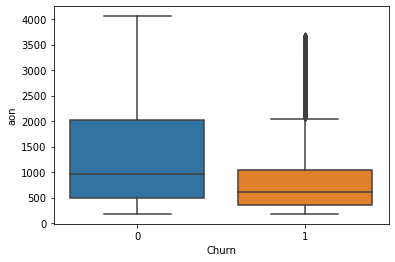

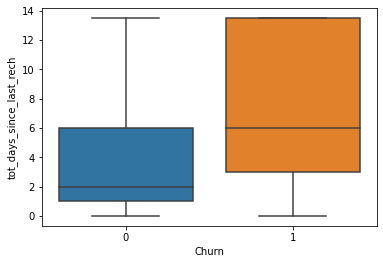

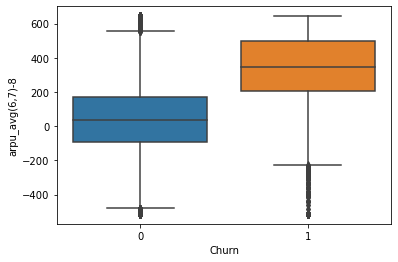

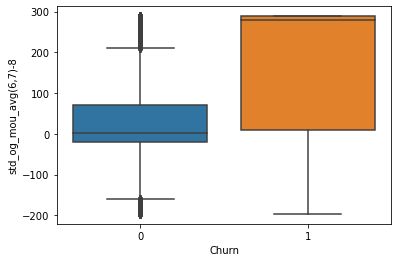

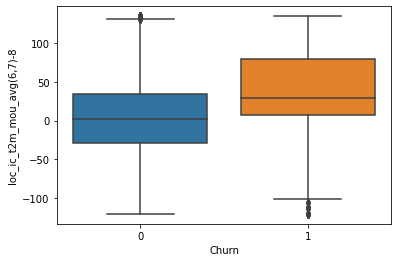

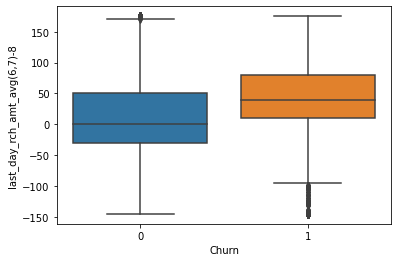

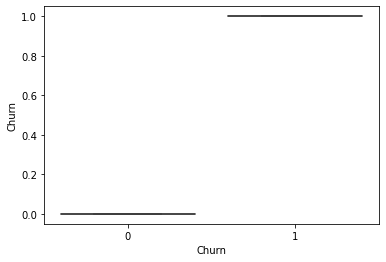

In [399]:

for i in col:
   
    
    
    sns.boxplot(data=churn_data, y=i, x="Churn")
    j+=1
    
    plt.show()


## Conclusion 
Random forest with PCA is showing test set Recall of 78% which is slightly lower than Logistic Regression 80% (diffrence of 20 users) customers, but Precession of 39% is significantly higher than 30% on Logistic Regression model(diffrence of 500 users).  
While selecting the best model Recall was considered, as higher thr recall higher is the probabality of identifying the churners correctly, if recall is similar Precession was considered, as higher the precession lower the number of false positive and thus lower the cost.
### Important Features as identified by Logistic regression Model
1. Age on Network (with a negative coeff of -2.5) higher the age of user on network lower the probability of churning.
2. Total Days Since Last recharge (coeff 2.24) if a user has not recharged for more than around 15 days probabality of churn increases.
3. Average recharge per user : if their is a fall in arpu in 8th month as compared to average of 6th and 7th month, churn probability increases, if the change is more than 300 probabality of churn becomes very high.
4. STD outgoing (Coeff 1.8) if their is a fall in STD outgoint in 8th month as compared to 6th and 7th month average, probability of churn becomes high. Similar trend is shown by incoming calls.
5. If last recharge amount for 8th month is significantly lower than average of 6th and 7th month probability of churn increases.

## Suggestions: 
1.Identify the customer's who has not recharged for more than 15 days, and offer them lower tarrif and new schemes.  
2.For new customers (age on nrtwork is less than 2years) offer new schemes lower STD Tarrifs.  
3 Identify customer's whose average recharge for current month is 300 or more less than average recharge for past two months and offer them lower tarrifs and new schemes